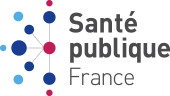

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, date
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_column', 162)
pd.set_option('display.max_row', 162)

# Contexte
L'agence **Santé publique France** a lancé un appel à projets pour trouver des idées innovantes d’applications en lien avec l'alimentation. Vous souhaitez y participer et proposer une idée d’application.


# Objectif
* Trouver une idée d’application : sélection des variables pertinentes
* Traitement des données ( imputation, gestion des valeurs aberrantes / manquantes)
* Automatisant des traitements.
* Tests hypothèses et analyses exploratoires
* Identifier des arguments justifiant la faisabilité (ou non) de l’application à partir des données Open Food Facts.
* Rédiger un rapport d’exploration et pitcher votre idée durant la soutenance du projet.


Chargez le fichier `fr.openfoodfacts.org.products.csv` à l'aide de Pandas. Stockez le résultat du chargement dans la variable `df`.

In [2]:
df = pd.read_csv('fr.openfoodfacts.org.products.csv', sep='\t') 

# Les  données
## Compréhension des données
Chargement des 4 fichiers csv avec la fonction read_csv de Pandas
<br> Utilisation des fonctions **head(),shape et describe()**

<img src='./oc_logo.png' width=15px /> Afficher les 5 premières lignes du dataframe `df`.

In [3]:
df.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_fr,ingredients_text,allergens,allergens_fr,traces,traces_tags,traces_fr,serving_size,no_nutriments,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_uk,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,butyric-acid_100g,caproic-acid_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,lignoceric-acid_100g,cerotic-acid_100g,montanic-acid_100g,melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,elaidic-acid_100g,gondoic-acid_100g,mead-acid_100g,erucic-acid_100g,nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,3087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,NaN,NaN,Ferme t'y R'nao,ferme-t-y-r-nao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:FR,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","A compléter,Informations nutritionnelles à com...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,États-Unis,"Bananas, vegetable oil (coconut oil, corn oil ...",NaN,NaN,NaN,NaN,NaN,28 g (1 ONZ),NaN,0.0,[ bananas -> en:bananas ] [ vegetable-oil -

<img src='./oc_logo.png' width=15px /> Quelle est la taille du dataframe ?

In [4]:
df.shape

(320772, 162)

<img src='./oc_logo.png' width=15px /> Calculez les statistiques élémentaires (min, max, moyenne, écart type, etc) pour toutes les variables quantitatives.

In [5]:
df.describe()

,no_nutriments,additives_n,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,nutrition_grade_uk,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,butyric-acid_100g,caproic-acid_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,lignoceric-acid_100g,cerotic-acid_100g,montanic-acid_100g,melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,elaidic-acid_100g,gondoic-acid_100g,mead-acid_100g,erucic-acid_100g,nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
count,0.0,248939.000000,248939.000000,0.0,248939.000000,0.0,0.0,2.611130e+05,857.000000,243891.000000,229554.000000,0.0,0.0,1.0,2.000000,4.000000,1.0,1.0,1.0,24.000000,23.000000,0.0,0.0,1.0,0.0,22823.000000,22859.000000,841.000000,186.000000,38.000000,78.000000,188.000000,149.000000,8.000000,24.000000,23.000000,21.000000,13.000000,0.0,1.400000e+01,0.0,0.0,0.0,143298.000000,144090.000000,243588.000000,244971.000000,72.000000,26.000000,38.000000,262.000000,4.000000,11.000000,266.000000,414.000000,200886.000000,259922.000000,27.000000,16.000000,9.000000,255510.000000,255463.000000,4133.000000,137554.000000,34.000000,7057.000000,1340.000000,918.000000,140867.000000,11154.000000,10815.000000,11729.000000,6784.000000,5240.000000,3042.000000,5.300000e+03,330.000000,2483.000000,38.000000,81.000000,24748.000000,158.000000,141050.000000,5845.000000,140462.000000,6253.000000,3929.000000,2106.000000,1620.000000,79.000000,1168.000000,20.000000,11.000000,259.000000,78.000000,29.000000,49.000000,3036.000000,165.000000,948.000000,0.0,268.000000,221210.000000,221210.000000,0.0,0.0
mean,NaN,1.936024,0.019659,NaN,0.055246,NaN,NaN,1.141915e+03,585.501214,12.730379,5.129932,NaN,NaN,7.4,6.040000,36.136182,18.9,8.1,3.0,10.752667,10.673913,NaN,NaN,61.0,NaN,10.425055,6.312493,3.182103,2.250285,3.186553,1.635462,16.229144,3.823819,0.057000,0.153842,0.061567,40.192857,25.123077,NaN,1.357143e-06,NaN,NaN,NaN,0.073476,0.020071,32.073981,16.003484,11.841667,2.878846,25.897368,6.354084,24.325000,12.163636,31.925000,49.790389,2.862111,7.075940,4.658148,2.506250,0.021678,2.028624,0.798815,7.838105,0.000397,0.518715,0.000008,0.056705,0.034219,0.023367,0.325574,0.259007,0.020303,0.023378,0.006898,0.205856,8.938696e-05,0.121290,0.072138,0.013123,0.119052,0.424635,0.092638,0.125163,0.617282,0.003652,0.534143,0.007950,0.025794,0.003014,0.012161,0.003126,0.001690,0.000401,0.000427,1.594563,0.145762,6.425698,31.458587,15.412121,49.547785,NaN,341.700764,9.165535,9.058049,NaN,NaN
std,NaN,2.502019,0.140524,NaN,0.269207,NaN,NaN,6.447154e+03,712.809943,17.578747,8.014238,NaN,NaN,NaN,0.226274,24.101433,NaN,NaN,NaN,4.019993,3.379647,NaN,NaN,NaN,NaN,17.0761

In [6]:
df.columns

Index(['code', 'url', 'creator', 'created_t', 'created_datetime',
       'last_modified_t', 'last_modified_datetime', 'product_name',
       'generic_name', 'quantity',
       ...
       'ph_100g', 'fruits-vegetables-nuts_100g',
       'collagen-meat-protein-ratio_100g', 'cocoa_100g', 'chlorophyl_100g',
       'carbon-footprint_100g', 'nutrition-score-fr_100g',
       'nutrition-score-uk_100g', 'glycemic-index_100g',
       'water-hardness_100g'],
      dtype='object', length=162)

In [7]:
for col in df.columns:
    print(col,df[col].nunique())

code 320638
url 320749
creator 3535
created_t 189636
created_datetime 189568
last_modified_t 180639
last_modified_datetime 180495
product_name 221347
generic_name 38584
quantity 13826
packaging 14547
packaging_tags 12064
brands 58784
brands_tags 50253
categories 36982
categories_tags 21142
categories_fr 21152
origins 4840
origins_tags 4372
manufacturing_places 7308
manufacturing_places_tags 6736
labels 18114
labels_tags 13653
labels_fr 13655
emb_codes 8462
emb_codes_tags 8158
first_packaging_code_geo 1602
cities 3
cities_tags 2572
purchase_places 5120
stores 3259
countries 1434
countries_tags 725
countries_fr 722
ingredients_text 205520
allergens 12939
allergens_fr 19
traces 8378
traces_tags 3578
traces_fr 3584
serving_size 25423
no_nutriments 0
additives_n 31
additives 196069
additives_tags 41537
additives_fr 41537
ingredients_from_palm_oil_n 3
ingredients_from_palm_oil 0
ingredients_from_palm_oil_tags 14
ingredients_that_may_be_from_palm_oil_n 7
ingredients_that_may_be_from_palm_oil 

Une composante dite « négative », calculée à partir des teneurs en nutriments dont la consommation doit être limitée : énergie, sucres simples, acides gras saturésn sel et sodium ;
<Br>
Une composante dite « positive », calculée en intégrant les teneurs en nutriment dont la consommation est recommandée : fibres, protéines;
<Br>
Une deuxième composante « positive », calculée à partir des teneurs d’une catégorie spécifique d’aliments : les fruits/légumes/fruits à coque.
<Br>
**Energie**
Les données qui nous interesse sont l’énergie (kJ/100g), la graisse, les gras saturés (g/100g), les sucres simples (g/100g) et le sel (mg/100g)
<Br>
**Nutritif**
des facteurs nutritionnels à favoriser : les fibres (g/100g), les protéines (g/100g), les fruits et légumes, légumineuses et fruits à coque (g/100g)


# Data Cleaning
## Filtre des données

In [8]:
df = df[['created_datetime',
         'countries',
         'creator',
         'product_name',
         'origins',
         'fat_100g',
         'sugars_100g',
         'energy_100g',
         'carbohydrates_100g',
         'saturated-fat_100g',
         'fiber_100g',
         'proteins_100g',
         'salt_100g',
         'fruits-vegetables-nuts_100g',
         'nutrition-score-fr_100g',
         'pnns_groups_1',
         'nutrition_grade_fr']]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320772 entries, 0 to 320771
Data columns (total 17 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   created_datetime             320763 non-null  object 
 1   countries                    320492 non-null  object 
 2   creator                      320770 non-null  object 
 3   product_name                 303010 non-null  object 
 4   origins                      22190 non-null   object 
 5   fat_100g                     243891 non-null  float64
 6   sugars_100g                  244971 non-null  float64
 7   energy_100g                  261113 non-null  float64
 8   carbohydrates_100g           243588 non-null  float64
 9   saturated-fat_100g           229554 non-null  float64
 10  fiber_100g                   200886 non-null  float64
 11  proteins_100g                259922 non-null  float64
 12  salt_100g                    255510 non-null  float64
 13 

## Missing Values

,Total,Percent
fruits-vegetables-nuts_100g,317736,0.990535
origins,298582,0.930823
pnns_groups_1,229259,0.714710
fiber_100g,119886,0.373742
nutrition_grade_fr,99562,0.310382
nutrition-score-fr_100g,99562,0.310382
saturated-fat_100g,91218,0.284370
carbohydrates_100g,77184,0.240620
fat_100g,76881,0.239675
sugars_100g,75801,0.236308


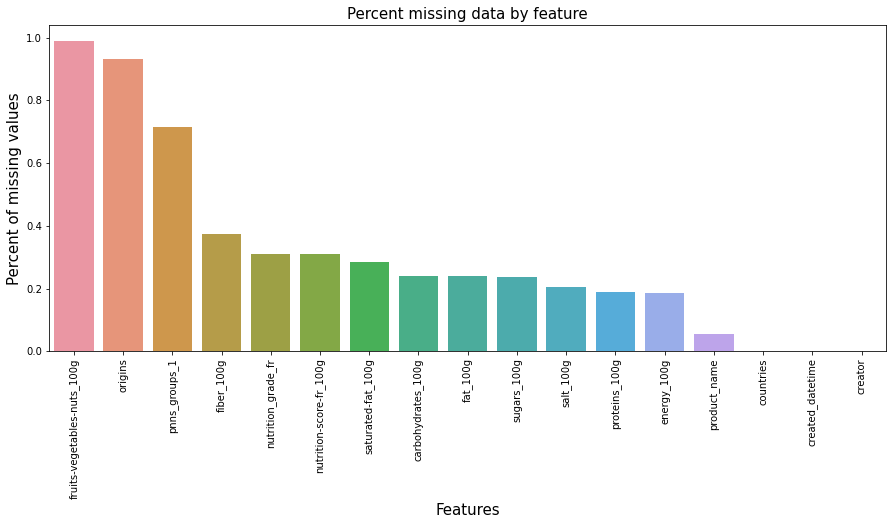

In [10]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation='90')
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)
missing_data


<AxesSubplot:>

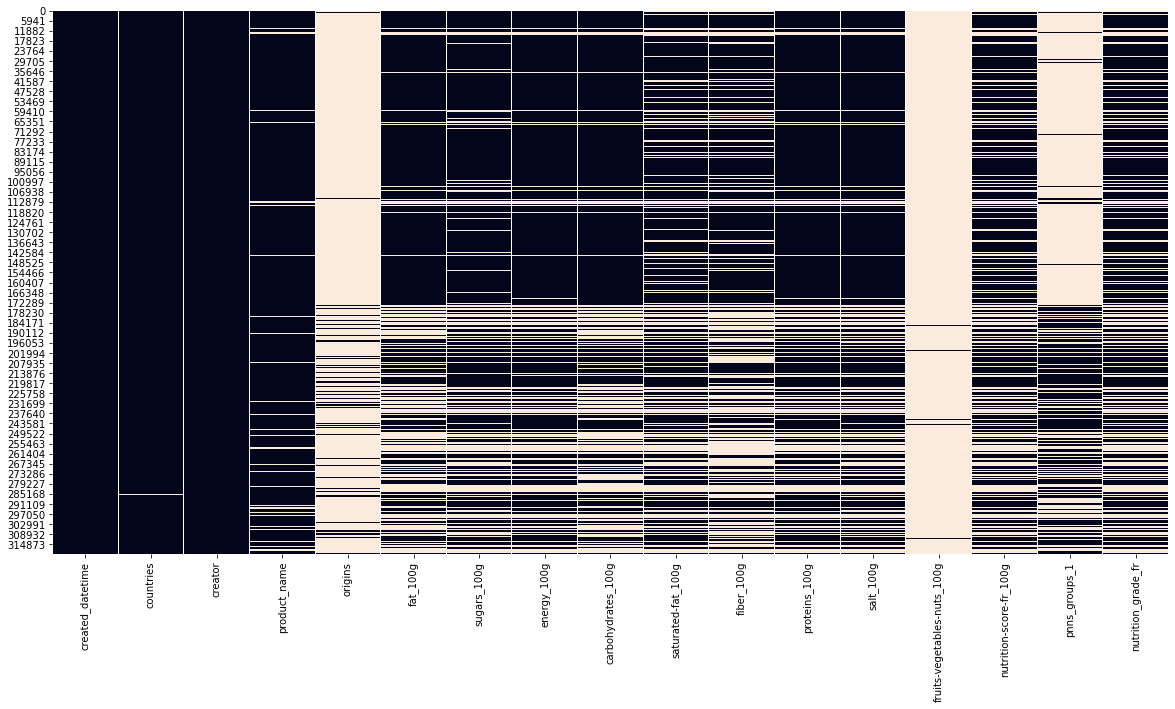

In [11]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(), cbar=False)

Nayant pas suffisament de données, nous décidons de retirer les features origins et fruits et vegetables, Malheureusement car l'information fruits et vegetables était interessante à exploiter pour le calcul du nutriscore.

In [12]:
#création de missing rate
missing_rate = df.isna().sum()/df.shape[0]

In [13]:
missing_rate

created_datetime               0.000028
countries                      0.000873
creator                        0.000006
product_name                   0.055373
origins                        0.930823
fat_100g                       0.239675
sugars_100g                    0.236308
energy_100g                    0.185986
carbohydrates_100g             0.240620
saturated-fat_100g             0.284370
fiber_100g                     0.373742
proteins_100g                  0.189699
salt_100g                      0.203453
fruits-vegetables-nuts_100g    0.990535
nutrition-score-fr_100g        0.310382
pnns_groups_1                  0.714710
nutrition_grade_fr             0.310382
dtype: float64

On fixe un seuil de 90% de valeurs manquantes, nous supprimerons les features avec un taux de missing value au delà

In [14]:
df.drop(df.columns[missing_rate>0.9], axis=1, inplace=True)

## Countries Column Filtering
Nous utiliserons regex pour conserver uniquement les lignes avec le nom France et FR

In [15]:
import re

In [16]:
df['countries'] = df['countries'].astype(str)

In [17]:
df['countries'].value_counts().index.tolist()

['US',
 'France',
 'en:FR',
 'Suisse',
 'Deutschland',
 'España',
 'United Kingdom',
 'United States',
 'en:CH',
 'en:BE',
 'en:GB',
 'Australia',
 'en:DE',
 'Россия',
 'en:ES',
 'Belgique',
 'en:US',
 'en:AU',
 'en:IT',
 'en:CA',
 'France, Suisse',
 'Portugal',
 'Germany',
 'Switzerland',
 'Italia',
 'Canada',
 'nan',
 'Nederland',
 'Belgium',
 'Spain',
 'Belgique,France',
 'en:CZ',
 'France,Suisse',
 'en:FR, Suisse',
 'en:AT',
 'en:TH',
 'en:NL',
 'Österreich',
 'Brasil',
 'Magyarország',
 'Denmark',
 'en:BR',
 'Germany,Switzerland',
 'Italie',
 'en:RU',
 'en:MA',
 'France,UK',
 'Italy',
 'en:LU',
 'Schweiz',
 'Ireland',
 'France,United Kingdom',
 'UK,France',
 'en:PT',
 'en:TW',
 'France, en:switzerland',
 'en:CN',
 'en:DZ',
 'Netherlands',
 'en:JP',
 'en:RO',
 'en:RE',
 'en:HK',
 'Frankreich,Deutschland',
 'France,Switzerland',
 'France, US',
 'France, en:belgium',
 'România',
 'en:NC',
 'Serbia',
 'Chile',
 'France,Allemagne',
 'New Zealand',
 'Guadeloupe',
 'en:SA',
 'France,Roya

In [18]:
France = re.compile('France')
FR = re.compile('en:FR')

In [19]:
df['France'] = df['countries'].str.extract('(France)', expand=True)
df['FR'] = df['countries'].str.extract('(FR)', expand=True)

In [20]:
df = df[(df['France'] == 'France') | (df['FR'] == 'FR')]

In [21]:
df.drop(['FR','France'], axis=1,inplace=True)

## Date Column Filtering
On s'interesse maintenant à la feature Created datetime pour avoir une idée de l'étendue temporelle de nos données (2017 à 2012)

In [22]:
df['created_datetime'] = df['created_datetime'].astype(str)

# Isoler les années avec la fonction split
df["Year"] = df['created_datetime'].apply(
    lambda x: x.split('-')[0])

In [23]:
# verification des date unique
df["Year"].nunique()

7

In [24]:
# nombre de dates
df["Year"].value_counts()

2016    30760
2017    23529
2015    22759
2014     9027
2013     8309
2012     3163
nan         1
Name: Year, dtype: int64

On remarque une 'année' correspondant à Nan. Nous eliminons cette ligne de notre dataframe

In [25]:
df[df["Year"]=='nan']

,created_datetime,countries,creator,product_name,fat_100g,sugars_100g,energy_100g,carbohydrates_100g,saturated-fat_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g,pnns_groups_1,nutrition_grade_fr,Year
187478,nan,"France,Suisse",marianne,Lulu la barquette (Fraise),2.1,60.0,1480.0,78.0,0.5,1.2,4.2,0.08,13.0,Sugary snacks,d,nan


In [26]:
df.drop([187478], axis=0, inplace=True)

In [27]:
## Visualisation du nombre de donnée par Created datetime

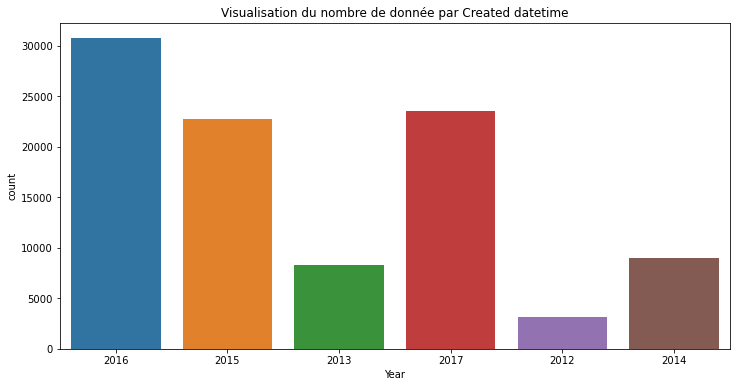

In [28]:
fig = plt.figure(figsize=(12,6))
sns.countplot(x=df["Year"]).set(title='Visualisation du nombre de donnée par Created datetime')
plt.show()

Pour notre analyse, notre plus grand contributeur sera openfoodfacts

In [29]:
df['creator'].value_counts()

openfoodfacts-contributors    28863
kiliweb                       13878
date-limite-app                7800
tacite                         7068
sebleouf                       5537
                              ...  
dfjose                            1
jack-lyon                         1
maelle                            1
ephore                            1
valentinaespina                   1
Name: creator, Length: 2583, dtype: int64

,Total,Percent
fiber_100g,52185,0.534973
carbohydrates_100g,50903,0.521831
fat_100g,50476,0.517453
nutrition-score-fr_100g,36648,0.375696
nutrition_grade_fr,36648,0.375696
saturated-fat_100g,35698,0.365957
sugars_100g,35562,0.364563
salt_100g,35499,0.363917
proteins_100g,33796,0.346459
energy_100g,33529,0.343721


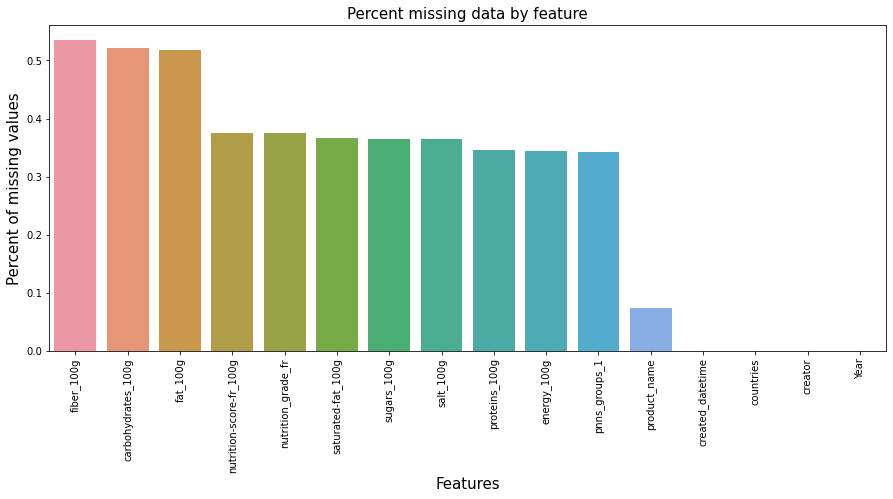

In [30]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation='90')
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)
missing_data

## Feature Pnns group1

In [31]:
df['pnns_groups_1'].nunique()

13

In [32]:
df['pnns_groups_1'].value_counts()

unknown                    12262
Sugary snacks               9259
Fish Meat Eggs              6752
Beverages                   6524
Milk and dairy products     6341
Composite foods             6033
Cereals and potatoes        6025
Fruits and vegetables       4044
Fat and sauces              3773
Salty snacks                2100
fruits-and-vegetables        546
sugary-snacks                470
cereals-and-potatoes           2
Name: pnns_groups_1, dtype: int64

In [33]:
# supression de Unknown
df.drop(index=df[df['pnns_groups_1'] == 'unknown'].index, inplace=True)

In [34]:
list(pd.unique(df.pnns_groups_1.values))

[nan,
 'Cereals and potatoes',
 'Sugary snacks',
 'Beverages',
 'Fish Meat Eggs',
 'Composite foods',
 'Fruits and vegetables',
 'Milk and dairy products',
 'Salty snacks',
 'Fat and sauces',
 'fruits-and-vegetables',
 'sugary-snacks',
 'cereals-and-potatoes']

In [35]:
df = df.replace("sugary-snacks", "Sugary snacks")
df = df.replace("cereals-and-potatoes", "Cereals and potatoes")
df = df.replace("fruits-and-vegetables", "Fruits and vegetables")

In [36]:
list(pd.unique(df.pnns_groups_1.values))

[nan,
 'Cereals and potatoes',
 'Sugary snacks',
 'Beverages',
 'Fish Meat Eggs',
 'Composite foods',
 'Fruits and vegetables',
 'Milk and dairy products',
 'Salty snacks',
 'Fat and sauces']

Text(0.5, 1.0, 'Pnns group1 value counts')

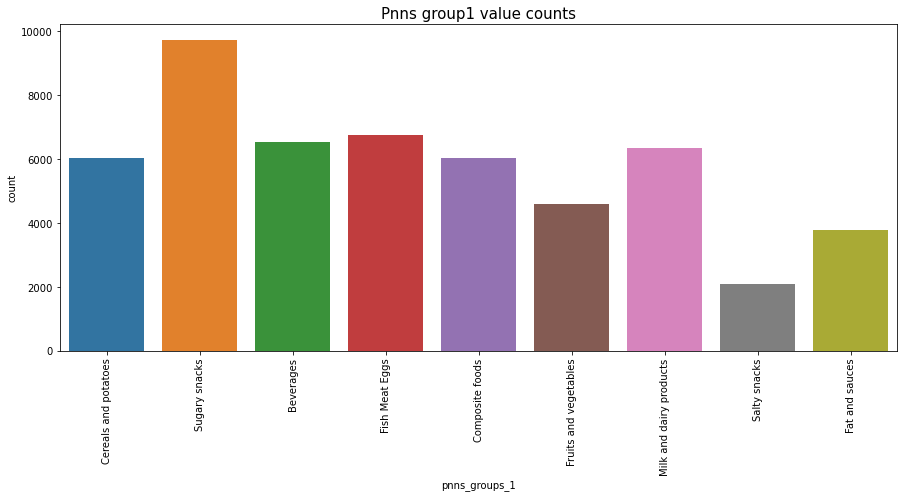

In [37]:
f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation='90')
sns.countplot(data=df, x="pnns_groups_1")
plt.title('Pnns group1 value counts', fontsize=15)

## Supression des features

<br>
Les features ayant servi au travail de filtrage précedement également seront supprimées pendant cette étape

In [38]:
df.drop(['created_datetime',"creator",'countries','Year'], axis=1,inplace=True)

In [39]:
df.shape

(85285, 12)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85285 entries, 0 to 320770
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   product_name             79171 non-null  object 
 1   fat_100g                 40341 non-null  float64
 2   sugars_100g              54594 non-null  float64
 3   energy_100g              56311 non-null  float64
 4   carbohydrates_100g       39937 non-null  float64
 5   saturated-fat_100g       54498 non-null  float64
 6   fiber_100g               40128 non-null  float64
 7   proteins_100g            56088 non-null  float64
 8   salt_100g                54643 non-null  float64
 9   nutrition-score-fr_100g  53791 non-null  float64
 10  pnns_groups_1            51869 non-null  object 
 11  nutrition_grade_fr       53791 non-null  object 
dtypes: float64(9), object(3)
memory usage: 10.5+ MB


## Duplicated Values
Nous nous interessons maintenant aux lignes dupliquées

In [41]:
# combien de valeurs manquantes dans les duplicated
df[df.duplicated()].isna().sum()

product_name               5985
fat_100g                   8402
sugars_100g                8376
energy_100g                8363
carbohydrates_100g         8411
saturated-fat_100g         8376
fiber_100g                 8751
proteins_100g              8364
salt_100g                  8369
nutrition-score-fr_100g    8376
pnns_groups_1              7061
nutrition_grade_fr         8376
dtype: int64

In [42]:
df_duplicated = df.drop_duplicates()

print(
    f"Il y a un total de {len(df) - len(df_duplicated)} lignes dupliquées.")

Il y a un total de 9180 lignes dupliquées.


In [43]:
df_duplicate = df

In [44]:
df.shape

(85285, 12)

# Valeurs aberrantes

In [45]:
df_after = df.copy()

In [46]:
numerical_value_100g = ['fat_100g', 'sugars_100g',
                        'carbohydrates_100g', 'saturated-fat_100g', 'fiber_100g',
                        'proteins_100g', 'salt_100g']

In [47]:
def range_0_100(df, cols):
    for col in cols:
        df.loc[df[col]>100,col] = np.nan
        df.loc[df[col]<0,col] = np.nan


In [48]:
range_0_100(df_after, numerical_value_100g)

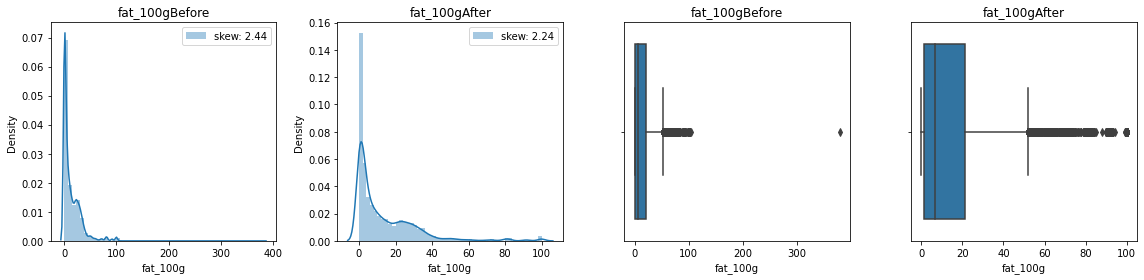

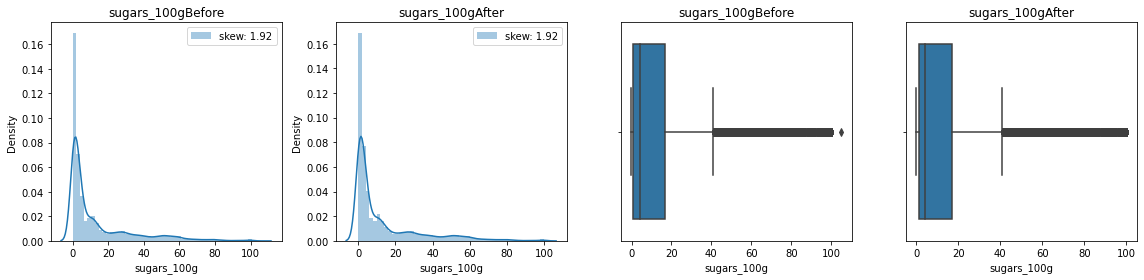

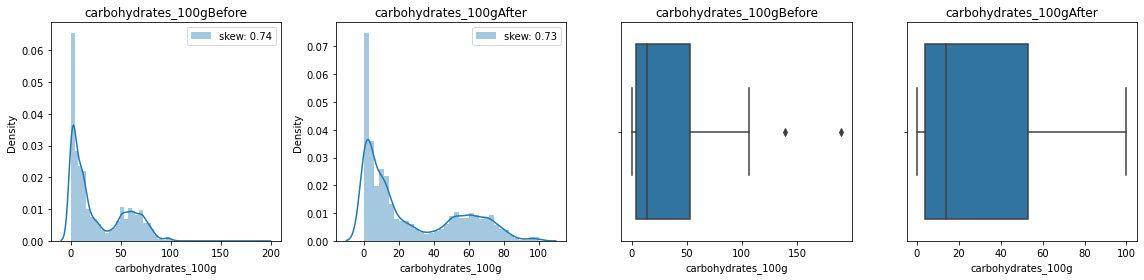

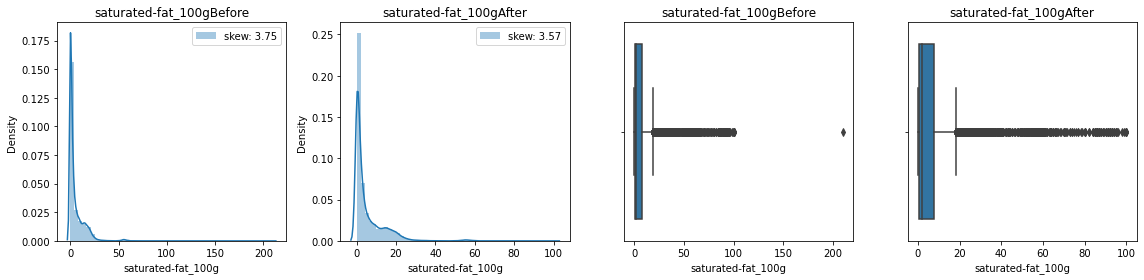

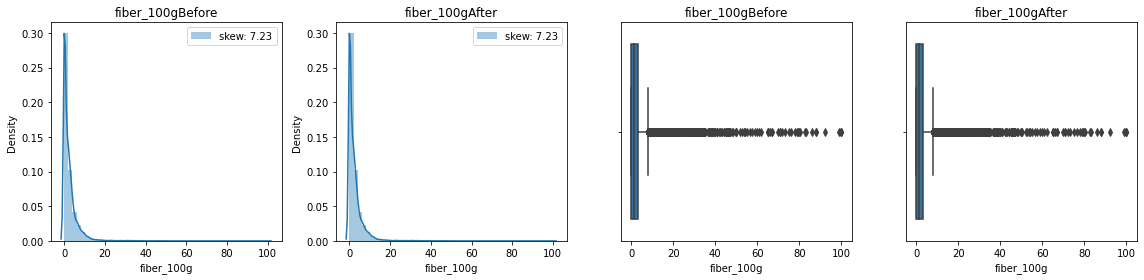

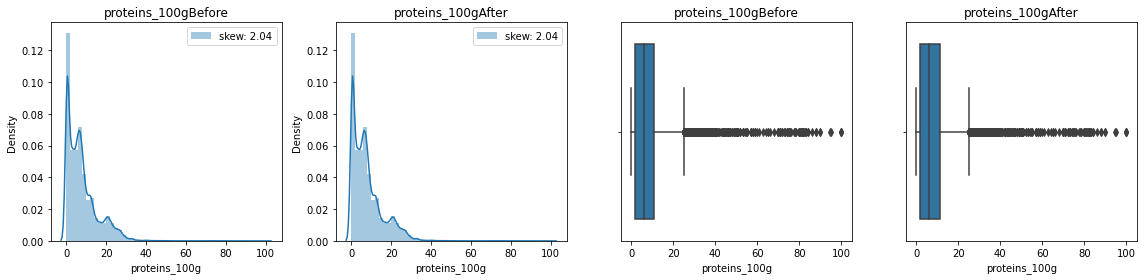

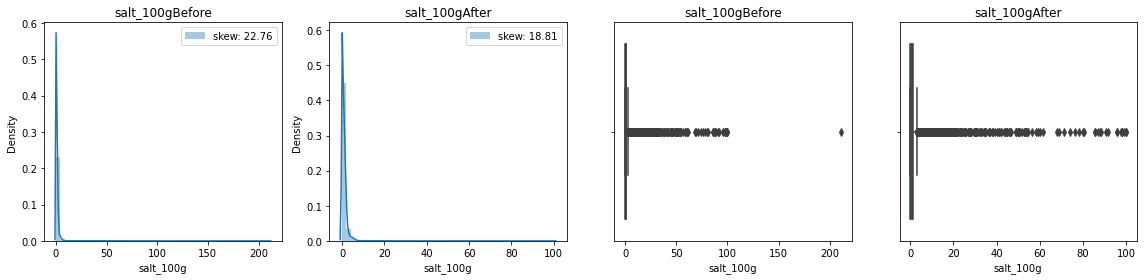

In [49]:
for col in numerical_value_100g:
    plt.figure(figsize=(16, 4))
    
    plt.subplot(141)
    sns.distplot(df[col], label="skew: "+str(np.round(df[col].skew(),2)))
    plt.title(col + "Before")
    plt.legend()
    
    plt.subplot(142)
    sns.distplot(df_after[col], label="skew: "+str(np.round(df_after[col].skew(),2)))
    plt.title(col + "After")
    plt.legend()
    
    plt.subplot(143)
    sns.boxplot(df[col])
    plt.title(col + "Before")
    
    plt.subplot(144)
    sns.boxplot(df_after[col])
    plt.title(col + "After")
    plt.tight_layout()
    plt.show()

## Fat_100g

In [50]:
df['fat_100g'].min()

0.0

In [51]:
df['fat_100g'].max()

380.0

In [52]:
df[df['fat_100g']>100]

,product_name,fat_100g,sugars_100g,energy_100g,carbohydrates_100g,saturated-fat_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g,pnns_groups_1,nutrition_grade_fr
245311,mini choux goût fromage de chèvre - poivre,380.0,22.7,18700.0,190.0,210.0,0.0,0.0,9.33,35.0,Salty snacks,e
305054,Graine de couscous moyen,105.0,2.5,1482.0,70.0,0.3,NaN,12.0,0.01,-1.0,Cereals and potatoes,a


## saturated-fat_100g

In [53]:
df['saturated-fat_100g'].min()

0.0

In [54]:
df['saturated-fat_100g'].max()

210.0

In [55]:
df[df['saturated-fat_100g']>100]

,product_name,fat_100g,sugars_100g,energy_100g,carbohydrates_100g,saturated-fat_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g,pnns_groups_1,nutrition_grade_fr
245311,mini choux goût fromage de chèvre - poivre,380.0,22.7,18700.0,190.0,210.0,0.0,0.0,9.33,35.0,Salty snacks,e


## sugars_100g

In [56]:
df['sugars_100g'].min()

-0.1

In [57]:
df['sugars_100g'].max()

105.0

In [58]:
df[df['sugars_100g']<0]

,product_name,fat_100g,sugars_100g,energy_100g,carbohydrates_100g,saturated-fat_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g,pnns_groups_1,nutrition_grade_fr
195761,Caprice des dieux,30.0,-0.1,1379.0,0.8,21.0,NaN,15.3,1.4,15.0,Milk and dairy products,d


In [59]:
df[df['sugars_100g']>100]

,product_name,fat_100g,sugars_100g,energy_100g,carbohydrates_100g,saturated-fat_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g,pnns_groups_1,nutrition_grade_fr
239347,Sirop d'agave,NaN,105.0,1785.0,105.0,NaN,NaN,NaN,NaN,NaN,Sugary snacks,NaN


## carbohydrates_100g 

In [60]:
df['carbohydrates_100g'].min()

0.0

In [61]:
df['carbohydrates_100g'].max()

190.0

In [62]:
df[df['carbohydrates_100g']>100]

,product_name,fat_100g,sugars_100g,energy_100g,carbohydrates_100g,saturated-fat_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g,pnns_groups_1,nutrition_grade_fr
234726,Palets pur beurre,52.0,52.0,3925.0,106.0,35.5,3.0,10.0,1.30048,31.0,Sugary snacks,e
239347,Sirop d'agave,NaN,105.0,1785.0,105.0,NaN,NaN,NaN,NaN,NaN,Sugary snacks,NaN
245311,mini choux goût fromage de chèvre - poivre,380.0,22.7,18700.0,190.0,210.0,0.0,0.0,9.33000,35.0,Salty snacks,e
317635,Banane sèche,0.0,41.5,1259.0,139.0,0.0,0.0,5.0,0.00000,4.0,Fruits and vegetables,c


## fiber_100g 

In [63]:
df['fiber_100g'].min()

0.0

In [64]:
df['fiber_100g'].max()

100.0

In [65]:
df[df['fiber_100g']>100]

,product_name,fat_100g,sugars_100g,energy_100g,carbohydrates_100g,saturated-fat_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g,pnns_groups_1,nutrition_grade_fr


## proteins_100g    

In [66]:
df['proteins_100g'].min()

0.0

In [67]:
df['proteins_100g'].max()

100.0

## salt_100g   

In [68]:
df['salt_100g'].min()

0.0

In [69]:
df['salt_100g'].max()

211.0

In [70]:
df[df['salt_100g']>100]

,product_name,fat_100g,sugars_100g,energy_100g,carbohydrates_100g,saturated-fat_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g,pnns_groups_1,nutrition_grade_fr
232239,Keeny Bio,23.0,26.7,1720.0,47.8,3.33,0.741,6.3,211.0,22.0,Sugary snacks,e


## Energy_100g
Quelle unitée de mesure Cal ou Joules

In [71]:
df['energy_100g'].describe()

count    56311.000000
mean      1113.709939
std        803.185132
min          0.000000
25%        414.000000
50%       1028.000000
75%       1648.000000
max      18700.000000
Name: energy_100g, dtype: float64

In [72]:
df[df['product_name']=='Cookies']

,product_name,fat_100g,sugars_100g,energy_100g,carbohydrates_100g,saturated-fat_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g,pnns_groups_1,nutrition_grade_fr
178084,Cookies,27.0,34.50,2132.0,58.0,12.00,3.5,7.0,1.2446,24.0,Sugary snacks,e
208629,Cookies,26.5,33.00,2118.0,58.5,12.50,NaN,6.5,1.2500,28.0,Sugary snacks,e
213357,Cookies,NaN,31.90,2142.0,NaN,13.20,2.9,5.9,1.3000,24.0,Sugary snacks,e
234713,Cookies,NaN,37.00,2138.0,NaN,27.70,0.0,5.9,0.6000,26.0,NaN,e
240765,Cookies,21.6,30.40,2061.0,65.8,10.40,3.4,6.8,0.6730,20.0,Sugary snacks,e
246351,Cookies,NaN,34.00,2029.0,NaN,12.00,5.0,7.0,0.4400,19.0,Sugary snacks,e
262391,Cookies,NaN,36.00,2008.0,NaN,7.30,6.3,3.5,0.7300,17.0,NaN,d
280200,Cookies,NaN,19.47,1966.0,NaN,18.65,0.0,4.9,0.2000,19.0,NaN,e
313435,Cookies,18.0,28.00,2020.0,74.0,8.50,NaN,5.5,0.9000,23.0,Sugary snacks,e


Selon USDA, Le cookie correspond à environ 502 calories soit environ 2100 Joules; Nous pouvons admettre qu'il semble que nos données soient en Joules

Parmi les aliments les plus caloriques, on retrouve les graisses d’origine animale
Ce type de graisse se caractérise par une forte teneur en gras saturé, source de cholestérol, tout en étant dépourvu de nutriments intéressants. L’huile de poisson et le lard par exemple apportent près de 900 calories par 100 grammes soit 3800 J pour 100g

In [73]:
df['energy_100g'].min()

0.0

In [74]:
df['energy_100g'].max()

18700.0

In [75]:
df[df['energy_100g']>3800]

,product_name,fat_100g,sugars_100g,energy_100g,carbohydrates_100g,saturated-fat_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g,pnns_groups_1,nutrition_grade_fr
56561,Tawny' Orange,NaN,65.00,5054.0,NaN,0.00,0.0,0.00,0.00000,20.0,NaN,e
161426,Huile d'avocat,NaN,0.00,3883.0,NaN,15.00,0.0,0.00,0.00000,20.0,NaN,e
178567,Confiserie Firenze Apfel Streuselkuchen Tiefge...,NaN,18.50,4197.0,NaN,3.90,0.0,2.90,0.11000,17.0,NaN,d
178787,Halva with Almonds,36.8,32.00,9983.0,44.2,7.80,NaN,12.90,0.00000,24.0,Sugary snacks,e
179179,Lot De 4 Baguettes,NaN,0.00,4184.0,NaN,0.00,0.0,0.00,0.00000,10.0,NaN,c
179586,Tomatentapenade Bakje 150 Gram (baresa) Koeling,NaN,13.00,4841.0,NaN,2.90,0.0,3.00,2.90000,24.0,NaN,e
181199,Sauce beurre blanc et citron confit,NaN,2.90,4607.0,NaN,17.00,2.0,0.50,1.20000,23.0,NaN,e
181503,Lardons fumés,20.0,0.70,4356.0,0.7,6.60,NaN,17.00,2.80000,26.0,Fish Meat Eggs,e
183135,Diot de Savoie,NaN,0.00,5050.0,NaN,9.70,0.0,18.00,22.00000,29.0,NaN,e
184458,Pruneaux d'Agen Dénoyautés,0.2,37.90,4117.0,52.3,0.10,0.0,2.40,0.01000,12.0,Fruits and vegetables,d


<AxesSubplot:xlabel='energy_100g'>

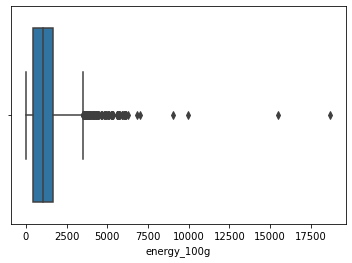

In [76]:
sns.boxplot(df['energy_100g'])

In [77]:
df.loc[df['energy_100g']>3800,'energy_100g'] = np.nan

<AxesSubplot:xlabel='energy_100g'>

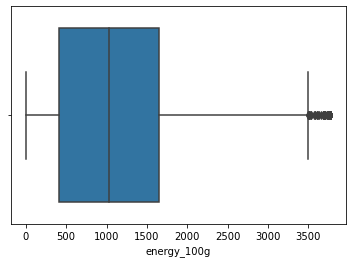

In [78]:
sns.boxplot(df['energy_100g'])

# Valeurs atypiques : 
Outliers par Pnns groupe, méthode interquartile (Tukey)

In [79]:
import scipy.stats as stats
import plotly.express as px

In [80]:
df = df_after
df_test_tukey = df.copy()

## Normalisation

In [81]:
from sklearn.preprocessing import StandardScaler

In [82]:
X = df_test_tukey.select_dtypes(include=np.number)

In [83]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [84]:
df_scaled = pd.DataFrame(X_scaled, columns=X.columns)
df_scaled.head()

,fat_100g,sugars_100g,energy_100g,carbohydrates_100g,saturated-fat_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [85]:
df_pnns = df_test_tukey['pnns_groups_1']

In [92]:
df_scaled = pd.concat([df_pnns, df_scaled], axis=1)

In [93]:
Q1 = df_scaled.quantile(0.25)
Q3 = df_scaled.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

fat_100g                   1.174162
sugars_100g                0.842201
energy_100g                1.536397
carbohydrates_100g         1.799876
saturated-fat_100g         0.827023
fiber_100g                 0.695349
proteins_100g              1.190358
salt_100g                  0.399513
nutrition-score-fr_100g    1.542532
dtype: float64


## Visualize using Box Plot

In [94]:
pd.unique(df.pnns_groups_1.values)

array([nan, 'Cereals and potatoes', 'Sugary snacks', 'Beverages',
       'Fish Meat Eggs', 'Composite foods', 'Fruits and vegetables',
       'Milk and dairy products', 'Salty snacks', 'Fat and sauces'],
      dtype=object)

### fat_100g

<Figure size 1080x432 with 0 Axes>

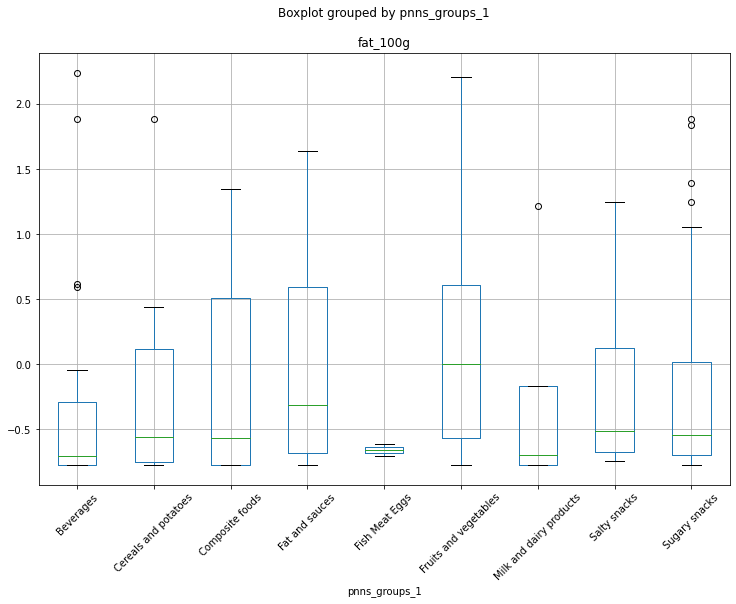

In [95]:
#Create a boxplot
plt.figure(figsize=(15, 6))
df.boxplot('fat_100g', by='pnns_groups_1', figsize=(12, 8))
plt.xticks(rotation='45')
plt.show()

<Figure size 1080x432 with 0 Axes>

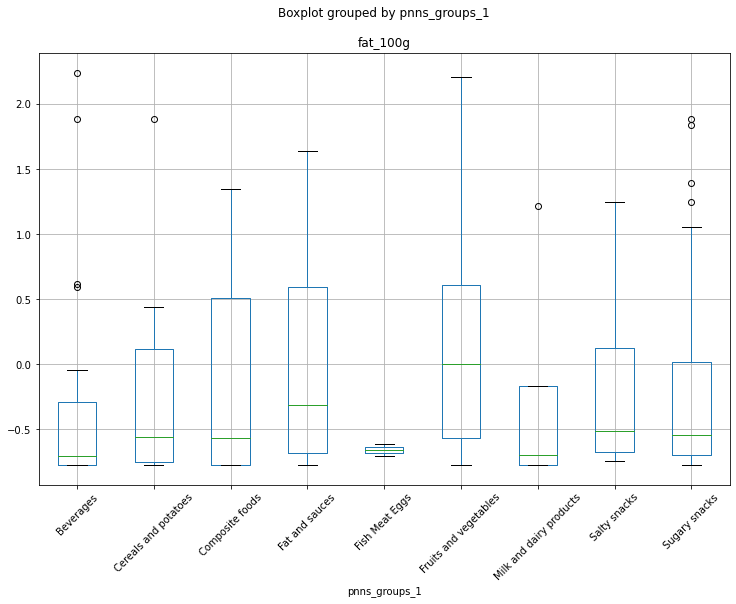

In [96]:
#Create a boxplot
plt.figure(figsize=(15, 6))
df_scaled.boxplot('fat_100g', by='pnns_groups_1', figsize=(12, 8))
plt.xticks(rotation='45')
plt.show()

In [97]:
q1 = df[df['pnns_groups_1'] == 'Beverages']['fat_100g'].quantile(.25)
q3 = df[df['pnns_groups_1'] == 'Beverages']['fat_100g'].quantile(.75)
IQR = q3 - q1
IQR
upper_boundary = q3 + (1.5 * IQR)
lower_boundary = q1 - (1.5 * IQR)
print("Upper Boundary using IQR  : {}".format(upper_boundary))
print("Lower Boundary using IQR  : {}".format(lower_boundary))

df_beverage = df[df['pnns_groups_1'] == 'Beverages']
df_beverage.loc[df_beverage['fat_100g'] > upper_boundary, 'fat_100g'] = np.nan

q1 = df[df['pnns_groups_1'] == 'Cereals and potatoes']['fat_100g'].quantile(.25)
q3 = df[df['pnns_groups_1'] == 'Cereals and potatoes']['fat_100g'].quantile(.75)
IQR = q3 - q1
IQR
upper_boundary = q3 + (1.5 * IQR)
lower_boundary = q1 - (1.5 * IQR)
print("Upper Boundary using IQR  : {}".format(upper_boundary))
print("Lower Boundary using IQR  : {}".format(lower_boundary))

df_cereals = df[df['pnns_groups_1'] == 'Cereals and potatoes']
df_cereals.loc[df_cereals['fat_100g'] > upper_boundary, 'fat_100g'] = np.nan

q1 = df[df['pnns_groups_1'] == 'Composite foods']['fat_100g'].quantile(.25)
q3 = df[df['pnns_groups_1'] == 'Composite foods']['fat_100g'].quantile(.75)
IQR = q3 - q1
IQR
upper_boundary = q3 + (1.5 * IQR)
lower_boundary = q1 - (1.5 * IQR)
print("Upper Boundary using IQR  : {}".format(upper_boundary))
print("Lower Boundary using IQR  : {}".format(lower_boundary))

df_composite = df[df['pnns_groups_1'] == 'Composite foods']
df_composite.loc[df_composite['fat_100g'] > upper_boundary, 'fat_100g'] = np.nan

q1 = df[df['pnns_groups_1'] == 'Fat and sauces']['fat_100g'].quantile(.25)
q3 = df[df['pnns_groups_1'] == 'Fat and sauces']['fat_100g'].quantile(.75)
IQR = q3 - q1
IQR
upper_boundary = q3 + (1.5 * IQR)
lower_boundary = q1 - (1.5 * IQR)
print("Upper Boundary using IQR  : {}".format(upper_boundary))
print("Lower Boundary using IQR  : {}".format(lower_boundary))
df_fat = df[df['pnns_groups_1'] == 'Fat and sauces']
df_fat.loc[df_fat['fat_100g'] > upper_boundary, 'fat_100g'] = np.nan

q1 = df[df['pnns_groups_1'] == 'Fish Meat Eggs']['fat_100g'].quantile(.25)
q3 = df[df['pnns_groups_1'] == 'Fish Meat Eggs']['fat_100g'].quantile(.75)
IQR = q3 - q1
IQR
upper_boundary = q3 + (1.5 * IQR)
lower_boundary = q1 - (1.5 * IQR)
print("Upper Boundary using IQR  : {}".format(upper_boundary))
print("Lower Boundary using IQR  : {}".format(lower_boundary))

df_fish = df[df['pnns_groups_1'] == 'Fish Meat Eggs']
df_fish.loc[df_fish['fat_100g'] > upper_boundary, 'fat_100g'] = np.nan

q1 = df[df['pnns_groups_1'] == 'Salty snacks']['fat_100g'].quantile(.25)
q3 = df[df['pnns_groups_1'] == 'Salty snacks']['fat_100g'].quantile(.75)
IQR = q3 - q1
IQR
upper_boundary = q3 + (1.5 * IQR)
lower_boundary = q1 - (1.5 * IQR)
print("Upper Boundary using IQR  : {}".format(upper_boundary))
print("Lower Boundary using IQR  : {}".format(lower_boundary))

df_salty = df[df['pnns_groups_1'] == 'Salty snacks']
df_salty.loc[df_salty['fat_100g'] > upper_boundary, 'fat_100g'] = np.nan

q1 = df[df['pnns_groups_1'] == 'Milk and dairy products']['fat_100g'].quantile(.25)
q3 = df[df['pnns_groups_1'] == 'Milk and dairy products']['fat_100g'].quantile(.75)
IQR = q3 - q1
IQR
upper_boundary = q3 + (1.5 * IQR)
lower_boundary = q1 - (1.5 * IQR)
print("Upper Boundary using IQR  : {}".format(upper_boundary))
print("Lower Boundary using IQR  : {}".format(lower_boundary))

df_milk = df[df['pnns_groups_1'] == 'Milk and dairy products']
df_milk.loc[df_milk['fat_100g'] > upper_boundary, 'fat_100g'] = np.nan

q1 = df[df['pnns_groups_1'] == 'Fruits and vegetables']['fat_100g'].quantile(.25)
q3 = df[df['pnns_groups_1'] == 'Fruits and vegetables']['fat_100g'].quantile(.75)
IQR = q3 - q1
IQR
upper_boundary = q3 + (1.5 * IQR)
lower_boundary = q1 - (1.5 * IQR)
print("Upper Boundary using IQR  : {}".format(upper_boundary))
print("Lower Boundary using IQR  : {}".format(lower_boundary))

df_fruits = df[df['pnns_groups_1'] == 'Fruits and vegetables']
df_fruits.loc[df_fruits['fat_100g'] > upper_boundary, 'fat_100g'] = np.nan

q1 = df[df['pnns_groups_1'] == 'Sugary snacks']['fat_100g'].quantile(.25)
q3 = df[df['pnns_groups_1'] == 'Sugary snacks']['fat_100g'].quantile(.75)
IQR = q3 - q1
IQR
upper_boundary = q3 + (1.5 * IQR)
lower_boundary = q1 - (1.5 * IQR)
print("Upper Boundary using IQR  : {}".format(upper_boundary))
print("Lower Boundary using IQR  : {}".format(lower_boundary))

df_sugary= df[df['pnns_groups_1'] == 'Sugary snacks']
df_sugary.loc[df_sugary['fat_100g'] > upper_boundary, 'fat_100g'] = np.nan

Upper Boundary using IQR  : 0.4452561801836704
Lower Boundary using IQR  : -1.509753293984604
Upper Boundary using IQR  : 1.4140848397197239
Lower Boundary using IQR  : -2.0447780761164545
Upper Boundary using IQR  : 2.4335239516196006
Lower Boundary using IQR  : -2.702713956846162
Upper Boundary using IQR  : 2.5072706107783156
Lower Boundary using IQR  : -2.5942629874951115
Upper Boundary using IQR  : -0.5683988800174835
Lower Boundary using IQR  : -0.7534885343766105
Upper Boundary using IQR  : 1.3280470707012233
Lower Boundary using IQR  : -1.8705335186924326
Upper Boundary using IQR  : 0.7512325150461016
Lower Boundary using IQR  : -1.6919509224943692
Upper Boundary using IQR  : 2.3836365057181172
Lower Boundary using IQR  : -2.341933732138333
Upper Boundary using IQR  : 1.1003000350640169
Lower Boundary using IQR  : -1.7801577108998905


In [ ]:
df = pd.concat([df_beverage, df_cereals, df_composite, df_fat,
               df_fish, df_salty, df_fruits, df_milk, df_sugary], axis=0)

In [ ]:
#Create a boxplot
plt.figure(figsize=(15, 6))
df.boxplot('fat_100g', by='pnns_groups_1', figsize=(12, 8))
plt.xticks(rotation='45')
plt.show()

### sugars_100g

In [ ]:
#Create a boxplot
plt.figure(figsize=(15, 6))
df.boxplot('sugars_100g', by='pnns_groups_1', figsize=(12, 8))
plt.xticks(rotation='45')
plt.show()

In [ ]:
q1 = df[df['pnns_groups_1'] == 'Beverages']['sugars_100g'].quantile(.25)
q3 = df[df['pnns_groups_1'] == 'Beverages']['sugars_100g'].quantile(.75)
IQR = q3 - q1
IQR
upper_boundary = q3 + (1.5 * IQR)
lower_boundary = q1 - (1.5 * IQR)
print("Upper Boundary using IQR  : {}".format(upper_boundary))
print("Lower Boundary using IQR  : {}".format(lower_boundary))

df_beverage = df[df['pnns_groups_1'] == 'Beverages']
df_beverage.loc[df_beverage['sugars_100g'] > upper_boundary, 'sugars_100g'] = np.nan

q1 = df[df['pnns_groups_1'] == 'Cereals and potatoes']['sugars_100g'].quantile(.25)
q3 = df[df['pnns_groups_1'] == 'Cereals and potatoes']['sugars_100g'].quantile(.75)
IQR = q3 - q1
IQR
upper_boundary = q3 + (1.5 * IQR)
lower_boundary = q1 - (1.5 * IQR)
print("Upper Boundary using IQR  : {}".format(upper_boundary))
print("Lower Boundary using IQR  : {}".format(lower_boundary))

df_cereals = df[df['pnns_groups_1'] == 'Cereals and potatoes']
df_cereals.loc[df_cereals['sugars_100g'] > upper_boundary, 'sugars_100g'] = np.nan

q1 = df[df['pnns_groups_1'] == 'Composite foods']['sugars_100g'].quantile(.25)
q3 = df[df['pnns_groups_1'] == 'Composite foods']['sugars_100g'].quantile(.75)
IQR = q3 - q1
IQR
upper_boundary = q3 + (1.5 * IQR)
lower_boundary = q1 - (1.5 * IQR)
print("Upper Boundary using IQR  : {}".format(upper_boundary))
print("Lower Boundary using IQR  : {}".format(lower_boundary))

df_composite = df[df['pnns_groups_1'] == 'Composite foods']
df_composite.loc[df_composite['sugars_100g'] > upper_boundary, 'sugars_100g'] = np.nan

q1 = df[df['pnns_groups_1'] == 'Fat and sauces']['sugars_100g'].quantile(.25)
q3 = df[df['pnns_groups_1'] == 'Fat and sauces']['sugars_100g'].quantile(.75)
IQR = q3 - q1
IQR
upper_boundary = q3 + (1.5 * IQR)
lower_boundary = q1 - (1.5 * IQR)
print("Upper Boundary using IQR  : {}".format(upper_boundary))
print("Lower Boundary using IQR  : {}".format(lower_boundary))
df_fat = df[df['pnns_groups_1'] == 'Fat and sauces']
df_fat.loc[df_fat['sugars_100g'] > upper_boundary, 'sugars_100g'] = np.nan

q1 = df[df['pnns_groups_1'] == 'Fish Meat Eggs']['sugars_100g'].quantile(.25)
q3 = df[df['pnns_groups_1'] == 'Fish Meat Eggs']['sugars_100g'].quantile(.75)
IQR = q3 - q1
IQR
upper_boundary = q3 + (1.5 * IQR)
lower_boundary = q1 - (1.5 * IQR)
print("Upper Boundary using IQR  : {}".format(upper_boundary))
print("Lower Boundary using IQR  : {}".format(lower_boundary))

df_fish = df[df['pnns_groups_1'] == 'Fish Meat Eggs']
df_fish.loc[df_fish['sugars_100g'] > upper_boundary, 'sugars_100g'] = np.nan

q1 = df[df['pnns_groups_1'] == 'Salty snacks']['sugars_100g'].quantile(.25)
q3 = df[df['pnns_groups_1'] == 'Salty snacks']['sugars_100g'].quantile(.75)
IQR = q3 - q1
IQR
upper_boundary = q3 + (1.5 * IQR)
lower_boundary = q1 - (1.5 * IQR)
print("Upper Boundary using IQR  : {}".format(upper_boundary))
print("Lower Boundary using IQR  : {}".format(lower_boundary))

df_salty = df[df['pnns_groups_1'] == 'Salty snacks']
df_salty.loc[df_salty['sugars_100g'] > upper_boundary, 'sugars_100g'] = np.nan

q1 = df[df['pnns_groups_1'] == 'Milk and dairy products']['sugars_100g'].quantile(.25)
q3 = df[df['pnns_groups_1'] == 'Milk and dairy products']['sugars_100g'].quantile(.75)
IQR = q3 - q1
IQR
upper_boundary = q3 + (1.5 * IQR)
lower_boundary = q1 - (1.5 * IQR)
print("Upper Boundary using IQR  : {}".format(upper_boundary))
print("Lower Boundary using IQR  : {}".format(lower_boundary))

df_milk = df[df['pnns_groups_1'] == 'Milk and dairy products']
df_milk.loc[df_milk['sugars_100g'] > upper_boundary, 'sugars_100g'] = np.nan

q1 = df[df['pnns_groups_1'] == 'Fruits and vegetables']['sugars_100g'].quantile(.25)
q3 = df[df['pnns_groups_1'] == 'Fruits and vegetables']['sugars_100g'].quantile(.75)
IQR = q3 - q1
IQR
upper_boundary = q3 + (1.5 * IQR)
lower_boundary = q1 - (1.5 * IQR)
print("Upper Boundary using IQR  : {}".format(upper_boundary))
print("Lower Boundary using IQR  : {}".format(lower_boundary))

df_fruits = df[df['pnns_groups_1'] == 'Fruits and vegetables']
df_fruits.loc[df_fruits['sugars_100g'] > upper_boundary, 'sugars_100g'] = np.nan

q1 = df[df['pnns_groups_1'] == 'Sugary snacks']['sugars_100g'].quantile(.25)
q3 = df[df['pnns_groups_1'] == 'Sugary snacks']['sugars_100g'].quantile(.75)
IQR = q3 - q1
IQR
upper_boundary = q3 + (1.5 * IQR)
lower_boundary = q1 - (1.5 * IQR)
print("Upper Boundary using IQR  : {}".format(upper_boundary))
print("Lower Boundary using IQR  : {}".format(lower_boundary))

df_sugary= df[df['pnns_groups_1'] == 'Sugary snacks']
df_sugary.loc[df_sugary['sugars_100g'] > upper_boundary, 'sugars_100g'] = np.nan

In [ ]:
df = pd.concat([df_beverage, df_cereals, df_composite, df_fat,
               df_fish, df_salty, df_fruits, df_milk, df_sugary], axis=0)

In [ ]:
#Create a boxplot
plt.figure(figsize=(15, 6))
df.boxplot('sugars_100g', by='pnns_groups_1', figsize=(12, 8))
plt.xticks(rotation='45')
plt.show()

### carbohydrates_100g

In [ ]:
#Create a boxplot
plt.figure(figsize=(15, 6))
df.boxplot('carbohydrates_100g', by='pnns_groups_1', figsize=(12, 8))
plt.xticks(rotation='45')
plt.show()

In [ ]:
q1 = df[df['pnns_groups_1'] == 'Beverages']['carbohydrates_100g'].quantile(.25)
q3 = df[df['pnns_groups_1'] == 'Beverages']['carbohydrates_100g'].quantile(.75)
IQR = q3 - q1
IQR
upper_boundary = q3 + (1.5 * IQR)
lower_boundary = q1 - (1.5 * IQR)
print("Upper Boundary using IQR  : {}".format(upper_boundary))
print("Lower Boundary using IQR  : {}".format(lower_boundary))

df_beverage = df[df['pnns_groups_1'] == 'Beverages']
df_beverage.loc[df_beverage['carbohydrates_100g'] > upper_boundary, 'carbohydrates_100g'] = np.nan

q1 = df[df['pnns_groups_1'] == 'Cereals and potatoes']['carbohydrates_100g'].quantile(.25)
q3 = df[df['pnns_groups_1'] == 'Cereals and potatoes']['carbohydrates_100g'].quantile(.75)
IQR = q3 - q1
IQR
upper_boundary = q3 + (1.5 * IQR)
lower_boundary = q1 - (1.5 * IQR)
print("Upper Boundary using IQR  : {}".format(upper_boundary))
print("Lower Boundary using IQR  : {}".format(lower_boundary))

df_cereals = df[df['pnns_groups_1'] == 'Cereals and potatoes']
df_cereals.loc[df_cereals['carbohydrates_100g'] > upper_boundary, 'carbohydrates_100g'] = np.nan
df_cereals.loc[df_cereals['carbohydrates_100g'] < lower_boundary, 'carbohydrates_100g'] = np.nan

q1 = df[df['pnns_groups_1'] == 'Composite foods']['carbohydrates_100g'].quantile(.25)
q3 = df[df['pnns_groups_1'] == 'Composite foods']['carbohydrates_100g'].quantile(.75)
IQR = q3 - q1
IQR
upper_boundary = q3 + (1.5 * IQR)
lower_boundary = q1 - (1.5 * IQR)
print("Upper Boundary using IQR  : {}".format(upper_boundary))
print("Lower Boundary using IQR  : {}".format(lower_boundary))

df_composite = df[df['pnns_groups_1'] == 'Composite foods']
df_composite.loc[df_composite['carbohydrates_100g'] > upper_boundary, 'carbohydrates_100g'] = np.nan

q1 = df[df['pnns_groups_1'] == 'Fat and sauces']['carbohydrates_100g'].quantile(.25)
q3 = df[df['pnns_groups_1'] == 'Fat and sauces']['carbohydrates_100g'].quantile(.75)
IQR = q3 - q1
IQR
upper_boundary = q3 + (1.5 * IQR)
lower_boundary = q1 - (1.5 * IQR)
print("Upper Boundary using IQR  : {}".format(upper_boundary))
print("Lower Boundary using IQR  : {}".format(lower_boundary))
df_fat = df[df['pnns_groups_1'] == 'Fat and sauces']
df_fat.loc[df_fat['carbohydrates_100g'] > upper_boundary, 'carbohydrates_100g'] = np.nan

q1 = df[df['pnns_groups_1'] == 'Fish Meat Eggs']['carbohydrates_100g'].quantile(.25)
q3 = df[df['pnns_groups_1'] == 'Fish Meat Eggs']['carbohydrates_100g'].quantile(.75)
IQR = q3 - q1
IQR
upper_boundary = q3 + (1.5 * IQR)
lower_boundary = q1 - (1.5 * IQR)
print("Upper Boundary using IQR  : {}".format(upper_boundary))
print("Lower Boundary using IQR  : {}".format(lower_boundary))

df_fish = df[df['pnns_groups_1'] == 'Fish Meat Eggs']
df_fish.loc[df_fish['carbohydrates_100g'] > upper_boundary, 'carbohydrates_100g'] = np.nan

q1 = df[df['pnns_groups_1'] == 'Salty snacks']['carbohydrates_100g'].quantile(.25)
q3 = df[df['pnns_groups_1'] == 'Salty snacks']['carbohydrates_100g'].quantile(.75)
IQR = q3 - q1
IQR
upper_boundary = q3 + (1.5 * IQR)
lower_boundary = q1 - (1.5 * IQR)
print("Upper Boundary using IQR  : {}".format(upper_boundary))
print("Lower Boundary using IQR  : {}".format(lower_boundary))

df_salty = df[df['pnns_groups_1'] == 'Salty snacks']
df_salty.loc[df_salty['carbohydrates_100g'] > upper_boundary, 'carbohydrates_100g'] = np.nan

q1 = df[df['pnns_groups_1'] == 'Milk and dairy products']['carbohydrates_100g'].quantile(.25)
q3 = df[df['pnns_groups_1'] == 'Milk and dairy products']['carbohydrates_100g'].quantile(.75)
IQR = q3 - q1
IQR
upper_boundary = q3 + (1.5 * IQR)
lower_boundary = q1 - (1.5 * IQR)
print("Upper Boundary using IQR  : {}".format(upper_boundary))
print("Lower Boundary using IQR  : {}".format(lower_boundary))

df_milk = df[df['pnns_groups_1'] == 'Milk and dairy products']
df_milk.loc[df_milk['carbohydrates_100g'] > upper_boundary, 'carbohydrates_100g'] = np.nan

q1 = df[df['pnns_groups_1'] == 'Fruits and vegetables']['carbohydrates_100g'].quantile(.25)
q3 = df[df['pnns_groups_1'] == 'Fruits and vegetables']['carbohydrates_100g'].quantile(.75)
IQR = q3 - q1
IQR
upper_boundary = q3 + (1.5 * IQR)
lower_boundary = q1 - (1.5 * IQR)
print("Upper Boundary using IQR  : {}".format(upper_boundary))
print("Lower Boundary using IQR  : {}".format(lower_boundary))

df_fruits = df[df['pnns_groups_1'] == 'Fruits and vegetables']
df_fruits.loc[df_fruits['carbohydrates_100g'] > upper_boundary, 'carbohydrates_100g'] = np.nan

q1 = df[df['pnns_groups_1'] == 'Sugary snacks']['carbohydrates_100g'].quantile(.25)
q3 = df[df['pnns_groups_1'] == 'Sugary snacks']['carbohydrates_100g'].quantile(.75)
IQR = q3 - q1
IQR
upper_boundary = q3 + (1.5 * IQR)
lower_boundary = q1 - (1.5 * IQR)
print("Upper Boundary using IQR  : {}".format(upper_boundary))
print("Lower Boundary using IQR  : {}".format(lower_boundary))

df_sugary= df[df['pnns_groups_1'] == 'Sugary snacks']
df_sugary.loc[df_sugary['carbohydrates_100g'] > upper_boundary, 'carbohydrates_100g'] = np.nan
df_sugary.loc[df_sugary['carbohydrates_100g'] < lower_boundary, 'carbohydrates_100g'] = np.nan

In [ ]:
df = pd.concat([df_beverage, df_cereals, df_composite, df_fat,
               df_fish, df_salty, df_fruits, df_milk, df_sugary], axis=0)

In [ ]:
#Create a boxplot
plt.figure(figsize=(15, 6))
df.boxplot('carbohydrates_100g', by='pnns_groups_1', figsize=(12, 8))
plt.xticks(rotation='45')
plt.show()

### saturated-fat_100g

In [ ]:
#Create a boxplot
plt.figure(figsize=(15, 6))
df.boxplot('saturated-fat_100g', by='pnns_groups_1', figsize=(12, 8))
plt.xticks(rotation='45')
plt.show()

In [ ]:
q1 = df[df['pnns_groups_1'] == 'Beverages']['saturated-fat_100g'].quantile(.25)
q3 = df[df['pnns_groups_1'] == 'Beverages']['saturated-fat_100g'].quantile(.75)
IQR = q3 - q1
IQR
upper_boundary = q3 + (1.5 * IQR)
lower_boundary = q1 - (1.5 * IQR)
print("Upper Boundary using IQR  : {}".format(upper_boundary))
print("Lower Boundary using IQR  : {}".format(lower_boundary))

df_beverage = df[df['pnns_groups_1'] == 'Beverages']
df_beverage.loc[df_beverage['saturated-fat_100g'] > upper_boundary, 'saturated-fat_100g'] = np.nan

q1 = df[df['pnns_groups_1'] == 'Cereals and potatoes']['saturated-fat_100g'].quantile(.25)
q3 = df[df['pnns_groups_1'] == 'Cereals and potatoes']['saturated-fat_100g'].quantile(.75)
IQR = q3 - q1
IQR
upper_boundary = q3 + (1.5 * IQR)
lower_boundary = q1 - (1.5 * IQR)
print("Upper Boundary using IQR  : {}".format(upper_boundary))
print("Lower Boundary using IQR  : {}".format(lower_boundary))

df_cereals = df[df['pnns_groups_1'] == 'Cereals and potatoes']
df_cereals.loc[df_cereals['saturated-fat_100g'] > upper_boundary, 'saturated-fat_100g'] = np.nan
df_cereals.loc[df_cereals['saturated-fat_100g'] < lower_boundary, 'saturated-fat_100g'] = np.nan

q1 = df[df['pnns_groups_1'] == 'Composite foods']['saturated-fat_100g'].quantile(.25)
q3 = df[df['pnns_groups_1'] == 'Composite foods']['saturated-fat_100g'].quantile(.75)
IQR = q3 - q1
IQR
upper_boundary = q3 + (1.5 * IQR)
lower_boundary = q1 - (1.5 * IQR)
print("Upper Boundary using IQR  : {}".format(upper_boundary))
print("Lower Boundary using IQR  : {}".format(lower_boundary))

df_composite = df[df['pnns_groups_1'] == 'Composite foods']
df_composite.loc[df_composite['saturated-fat_100g'] > upper_boundary, 'saturated-fat_100g'] = np.nan

q1 = df[df['pnns_groups_1'] == 'Fat and sauces']['saturated-fat_100g'].quantile(.25)
q3 = df[df['pnns_groups_1'] == 'Fat and sauces']['saturated-fat_100g'].quantile(.75)
IQR = q3 - q1
IQR
upper_boundary = q3 + (1.5 * IQR)
lower_boundary = q1 - (1.5 * IQR)
print("Upper Boundary using IQR  : {}".format(upper_boundary))
print("Lower Boundary using IQR  : {}".format(lower_boundary))
df_fat = df[df['pnns_groups_1'] == 'Fat and sauces']
df_fat.loc[df_fat['saturated-fat_100g'] > upper_boundary, 'saturated-fat_100g'] = np.nan

q1 = df[df['pnns_groups_1'] == 'Fish Meat Eggs']['saturated-fat_100g'].quantile(.25)
q3 = df[df['pnns_groups_1'] == 'Fish Meat Eggs']['saturated-fat_100g'].quantile(.75)
IQR = q3 - q1
IQR
upper_boundary = q3 + (1.5 * IQR)
lower_boundary = q1 - (1.5 * IQR)
print("Upper Boundary using IQR  : {}".format(upper_boundary))
print("Lower Boundary using IQR  : {}".format(lower_boundary))

df_fish = df[df['pnns_groups_1'] == 'Fish Meat Eggs']
df_fish.loc[df_fish['saturated-fat_100g'] > upper_boundary, 'saturated-fat_100g'] = np.nan

q1 = df[df['pnns_groups_1'] == 'Salty snacks']['saturated-fat_100g'].quantile(.25)
q3 = df[df['pnns_groups_1'] == 'Salty snacks']['saturated-fat_100g'].quantile(.75)
IQR = q3 - q1
IQR
upper_boundary = q3 + (1.5 * IQR)
lower_boundary = q1 - (1.5 * IQR)
print("Upper Boundary using IQR  : {}".format(upper_boundary))
print("Lower Boundary using IQR  : {}".format(lower_boundary))

df_salty = df[df['pnns_groups_1'] == 'Salty snacks']
df_salty.loc[df_salty['saturated-fat_100g'] > upper_boundary, 'saturated-fat_100g'] = np.nan

q1 = df[df['pnns_groups_1'] == 'Milk and dairy products']['saturated-fat_100g'].quantile(.25)
q3 = df[df['pnns_groups_1'] == 'Milk and dairy products']['saturated-fat_100g'].quantile(.75)
IQR = q3 - q1
IQR
upper_boundary = q3 + (1.5 * IQR)
lower_boundary = q1 - (1.5 * IQR)
print("Upper Boundary using IQR  : {}".format(upper_boundary))
print("Lower Boundary using IQR  : {}".format(lower_boundary))

df_milk = df[df['pnns_groups_1'] == 'Milk and dairy products']
df_milk.loc[df_milk['saturated-fat_100g'] > upper_boundary, 'saturated-fat_100g'] = np.nan

q1 = df[df['pnns_groups_1'] == 'Fruits and vegetables']['saturated-fat_100g'].quantile(.25)
q3 = df[df['pnns_groups_1'] == 'Fruits and vegetables']['saturated-fat_100g'].quantile(.75)
IQR = q3 - q1
IQR
upper_boundary = q3 + (1.5 * IQR)
lower_boundary = q1 - (1.5 * IQR)
print("Upper Boundary using IQR  : {}".format(upper_boundary))
print("Lower Boundary using IQR  : {}".format(lower_boundary))

df_fruits = df[df['pnns_groups_1'] == 'Fruits and vegetables']
df_fruits.loc[df_fruits['saturated-fat_100g'] > upper_boundary, 'saturated-fat_100g'] = np.nan

q1 = df[df['pnns_groups_1'] == 'Sugary snacks']['saturated-fat_100g'].quantile(.25)
q3 = df[df['pnns_groups_1'] == 'Sugary snacks']['saturated-fat_100g'].quantile(.75)
IQR = q3 - q1
IQR
upper_boundary = q3 + (1.5 * IQR)
lower_boundary = q1 - (1.5 * IQR)
print("Upper Boundary using IQR  : {}".format(upper_boundary))
print("Lower Boundary using IQR  : {}".format(lower_boundary))

df_sugary= df[df['pnns_groups_1'] == 'Sugary snacks']
df_sugary.loc[df_sugary['saturated-fat_100g'] > upper_boundary, 'saturated-fat_100g'] = np.nan
df_sugary.loc[df_sugary['saturated-fat_100g'] < lower_boundary, 'saturated-fat_100g'] = np.nan

In [ ]:
df = pd.concat([df_beverage, df_cereals, df_composite, df_fat,
               df_fish, df_salty, df_fruits, df_milk, df_sugary], axis=0)

In [ ]:
#Create a boxplot
plt.figure(figsize=(15, 6))
df.boxplot('saturated-fat_100g', by='pnns_groups_1', figsize=(12, 8))
plt.xticks(rotation='45')
plt.show()

### fiber_100g

In [ ]:
#Create a boxplot
plt.figure(figsize=(15, 6))
df.boxplot('fiber_100g', by='pnns_groups_1', figsize=(12, 8))
plt.xticks(rotation='45')
plt.show()

In [ ]:
q1 = df[df['pnns_groups_1'] == 'Beverages']['fiber_100g'].quantile(.25)
q3 = df[df['pnns_groups_1'] == 'Beverages']['fiber_100g'].quantile(.75)
IQR = q3 - q1
IQR
upper_boundary = q3 + (1.5 * IQR)
lower_boundary = q1 - (1.5 * IQR)
print("Upper Boundary using IQR  : {}".format(upper_boundary))
print("Lower Boundary using IQR  : {}".format(lower_boundary))

df_beverage = df[df['pnns_groups_1'] == 'Beverages']
df_beverage.loc[df_beverage['fiber_100g'] > upper_boundary, 'fiber_100g'] = np.nan

q1 = df[df['pnns_groups_1'] == 'Cereals and potatoes']['fiber_100g'].quantile(.25)
q3 = df[df['pnns_groups_1'] == 'Cereals and potatoes']['fiber_100g'].quantile(.75)
IQR = q3 - q1
IQR
upper_boundary = q3 + (1.5 * IQR)
lower_boundary = q1 - (1.5 * IQR)
print("Upper Boundary using IQR  : {}".format(upper_boundary))
print("Lower Boundary using IQR  : {}".format(lower_boundary))

df_cereals = df[df['pnns_groups_1'] == 'Cereals and potatoes']
df_cereals.loc[df_cereals['fiber_100g'] > upper_boundary, 'fiber_100g'] = np.nan
df_cereals.loc[df_cereals['fiber_100g'] < lower_boundary, 'fiber_100g'] = np.nan

q1 = df[df['pnns_groups_1'] == 'Composite foods']['fiber_100g'].quantile(.25)
q3 = df[df['pnns_groups_1'] == 'Composite foods']['fiber_100g'].quantile(.75)
IQR = q3 - q1
IQR
upper_boundary = q3 + (1.5 * IQR)
lower_boundary = q1 - (1.5 * IQR)
print("Upper Boundary using IQR  : {}".format(upper_boundary))
print("Lower Boundary using IQR  : {}".format(lower_boundary))

df_composite = df[df['pnns_groups_1'] == 'Composite foods']
df_composite.loc[df_composite['fiber_100g'] > upper_boundary, 'fiber_100g'] = np.nan

q1 = df[df['pnns_groups_1'] == 'Fat and sauces']['fiber_100g'].quantile(.25)
q3 = df[df['pnns_groups_1'] == 'Fat and sauces']['fiber_100g'].quantile(.75)
IQR = q3 - q1
IQR
upper_boundary = q3 + (1.5 * IQR)
lower_boundary = q1 - (1.5 * IQR)
print("Upper Boundary using IQR  : {}".format(upper_boundary))
print("Lower Boundary using IQR  : {}".format(lower_boundary))
df_fat = df[df['pnns_groups_1'] == 'Fat and sauces']
df_fat.loc[df_fat['fiber_100g'] > upper_boundary, 'fiber_100g'] = np.nan

q1 = df[df['pnns_groups_1'] == 'Fish Meat Eggs']['fiber_100g'].quantile(.25)
q3 = df[df['pnns_groups_1'] == 'Fish Meat Eggs']['fiber_100g'].quantile(.75)
IQR = q3 - q1
IQR
upper_boundary = q3 + (1.5 * IQR)
lower_boundary = q1 - (1.5 * IQR)
print("Upper Boundary using IQR  : {}".format(upper_boundary))
print("Lower Boundary using IQR  : {}".format(lower_boundary))

df_fish = df[df['pnns_groups_1'] == 'Fish Meat Eggs']
df_fish.loc[df_fish['fiber_100g'] > upper_boundary, 'fiber_100g'] = np.nan

q1 = df[df['pnns_groups_1'] == 'Salty snacks']['fiber_100g'].quantile(.25)
q3 = df[df['pnns_groups_1'] == 'Salty snacks']['fiber_100g'].quantile(.75)
IQR = q3 - q1
IQR
upper_boundary = q3 + (1.5 * IQR)
lower_boundary = q1 - (1.5 * IQR)
print("Upper Boundary using IQR  : {}".format(upper_boundary))
print("Lower Boundary using IQR  : {}".format(lower_boundary))

df_salty = df[df['pnns_groups_1'] == 'Salty snacks']
df_salty.loc[df_salty['fiber_100g'] > upper_boundary, 'fiber_100g'] = np.nan

q1 = df[df['pnns_groups_1'] == 'Milk and dairy products']['fiber_100g'].quantile(.25)
q3 = df[df['pnns_groups_1'] == 'Milk and dairy products']['fiber_100g'].quantile(.75)
IQR = q3 - q1
IQR
upper_boundary = q3 + (1.5 * IQR)
lower_boundary = q1 - (1.5 * IQR)
print("Upper Boundary using IQR  : {}".format(upper_boundary))
print("Lower Boundary using IQR  : {}".format(lower_boundary))

df_milk = df[df['pnns_groups_1'] == 'Milk and dairy products']
df_milk.loc[df_milk['fiber_100g'] > upper_boundary, 'fiber_100g'] = np.nan

q1 = df[df['pnns_groups_1'] == 'Fruits and vegetables']['fiber_100g'].quantile(.25)
q3 = df[df['pnns_groups_1'] == 'Fruits and vegetables']['fiber_100g'].quantile(.75)
IQR = q3 - q1
IQR
upper_boundary = q3 + (1.5 * IQR)
lower_boundary = q1 - (1.5 * IQR)
print("Upper Boundary using IQR  : {}".format(upper_boundary))
print("Lower Boundary using IQR  : {}".format(lower_boundary))

df_fruits = df[df['pnns_groups_1'] == 'Fruits and vegetables']
df_fruits.loc[df_fruits['fiber_100g'] > upper_boundary, 'fiber_100g'] = np.nan

q1 = df[df['pnns_groups_1'] == 'Sugary snacks']['fiber_100g'].quantile(.25)
q3 = df[df['pnns_groups_1'] == 'Sugary snacks']['fiber_100g'].quantile(.75)
IQR = q3 - q1
IQR
upper_boundary = q3 + (1.5 * IQR)
lower_boundary = q1 - (1.5 * IQR)
print("Upper Boundary using IQR  : {}".format(upper_boundary))
print("Lower Boundary using IQR  : {}".format(lower_boundary))

df_sugary= df[df['pnns_groups_1'] == 'Sugary snacks']
df_sugary.loc[df_sugary['fiber_100g'] > upper_boundary, 'fiber_100g'] = np.nan
df_sugary.loc[df_sugary['fiber_100g'] < lower_boundary, 'fiber_100g'] = np.nan

In [ ]:
df = pd.concat([df_beverage, df_cereals, df_composite, df_fat,
               df_fish, df_salty, df_fruits, df_milk, df_sugary], axis=0)

In [ ]:
#Create a boxplot
plt.figure(figsize=(15, 6))
df.boxplot('fiber_100g', by='pnns_groups_1', figsize=(12, 8))
plt.xticks(rotation='45')
plt.show()

### proteins_100g

In [ ]:
#Create a boxplot
plt.figure(figsize=(15, 6))
df.boxplot('proteins_100g', by='pnns_groups_1', figsize=(12, 8))
plt.xticks(rotation='45')
plt.show()

In [ ]:
q1 = df[df['pnns_groups_1'] == 'Beverages']['proteins_100g'].quantile(.25)
q3 = df[df['pnns_groups_1'] == 'Beverages']['proteins_100g'].quantile(.75)
IQR = q3 - q1
IQR
upper_boundary = q3 + (1.5 * IQR)
lower_boundary = q1 - (1.5 * IQR)
print("Upper Boundary using IQR  : {}".format(upper_boundary))
print("Lower Boundary using IQR  : {}".format(lower_boundary))

df_beverage = df[df['pnns_groups_1'] == 'Beverages']
df_beverage.loc[df_beverage['proteins_100g'] > upper_boundary, 'proteins_100g'] = np.nan

q1 = df[df['pnns_groups_1'] == 'Cereals and potatoes']['proteins_100g'].quantile(.25)
q3 = df[df['pnns_groups_1'] == 'Cereals and potatoes']['proteins_100g'].quantile(.75)
IQR = q3 - q1
IQR
upper_boundary = q3 + (1.5 * IQR)
lower_boundary = q1 - (1.5 * IQR)
print("Upper Boundary using IQR  : {}".format(upper_boundary))
print("Lower Boundary using IQR  : {}".format(lower_boundary))

df_cereals = df[df['pnns_groups_1'] == 'Cereals and potatoes']
df_cereals.loc[df_cereals['proteins_100g'] > upper_boundary, 'proteins_100g'] = np.nan
df_cereals.loc[df_cereals['proteins_100g'] < lower_boundary, 'proteins_100g'] = np.nan

q1 = df[df['pnns_groups_1'] == 'Composite foods']['proteins_100g'].quantile(.25)
q3 = df[df['pnns_groups_1'] == 'Composite foods']['proteins_100g'].quantile(.75)
IQR = q3 - q1
IQR
upper_boundary = q3 + (1.5 * IQR)
lower_boundary = q1 - (1.5 * IQR)
print("Upper Boundary using IQR  : {}".format(upper_boundary))
print("Lower Boundary using IQR  : {}".format(lower_boundary))

df_composite = df[df['pnns_groups_1'] == 'Composite foods']
df_composite.loc[df_composite['proteins_100g'] > upper_boundary, 'proteins_100g'] = np.nan

q1 = df[df['pnns_groups_1'] == 'Fat and sauces']['proteins_100g'].quantile(.25)
q3 = df[df['pnns_groups_1'] == 'Fat and sauces']['proteins_100g'].quantile(.75)
IQR = q3 - q1
IQR
upper_boundary = q3 + (1.5 * IQR)
lower_boundary = q1 - (1.5 * IQR)
print("Upper Boundary using IQR  : {}".format(upper_boundary))
print("Lower Boundary using IQR  : {}".format(lower_boundary))
df_fat = df[df['pnns_groups_1'] == 'Fat and sauces']
df_fat.loc[df_fat['proteins_100g'] > upper_boundary, 'proteins_100g'] = np.nan

q1 = df[df['pnns_groups_1'] == 'Fish Meat Eggs']['proteins_100g'].quantile(.25)
q3 = df[df['pnns_groups_1'] == 'Fish Meat Eggs']['proteins_100g'].quantile(.75)
IQR = q3 - q1
IQR
upper_boundary = q3 + (1.5 * IQR)
lower_boundary = q1 - (1.5 * IQR)
print("Upper Boundary using IQR  : {}".format(upper_boundary))
print("Lower Boundary using IQR  : {}".format(lower_boundary))

df_fish = df[df['pnns_groups_1'] == 'Fish Meat Eggs']
df_fish.loc[df_fish['proteins_100g'] > upper_boundary, 'proteins_100g'] = np.nan
df_fish.loc[df_fish['proteins_100g'] < lower_boundary, 'proteins_100g'] = np.nan

q1 = df[df['pnns_groups_1'] == 'Salty snacks']['proteins_100g'].quantile(.25)
q3 = df[df['pnns_groups_1'] == 'Salty snacks']['proteins_100g'].quantile(.75)
IQR = q3 - q1
IQR
upper_boundary = q3 + (1.5 * IQR)
lower_boundary = q1 - (1.5 * IQR)
print("Upper Boundary using IQR  : {}".format(upper_boundary))
print("Lower Boundary using IQR  : {}".format(lower_boundary))

df_salty = df[df['pnns_groups_1'] == 'Salty snacks']
df_salty.loc[df_salty['proteins_100g'] > upper_boundary, 'proteins_100g'] = np.nan

q1 = df[df['pnns_groups_1'] == 'Milk and dairy products']['proteins_100g'].quantile(.25)
q3 = df[df['pnns_groups_1'] == 'Milk and dairy products']['proteins_100g'].quantile(.75)
IQR = q3 - q1
IQR
upper_boundary = q3 + (1.5 * IQR)
lower_boundary = q1 - (1.5 * IQR)
print("Upper Boundary using IQR  : {}".format(upper_boundary))
print("Lower Boundary using IQR  : {}".format(lower_boundary))

df_milk = df[df['pnns_groups_1'] == 'Milk and dairy products']
df_milk.loc[df_milk['proteins_100g'] > upper_boundary, 'proteins_100g'] = np.nan

q1 = df[df['pnns_groups_1'] == 'Fruits and vegetables']['proteins_100g'].quantile(.25)
q3 = df[df['pnns_groups_1'] == 'Fruits and vegetables']['proteins_100g'].quantile(.75)
IQR = q3 - q1
IQR
upper_boundary = q3 + (1.5 * IQR)
lower_boundary = q1 - (1.5 * IQR)
print("Upper Boundary using IQR  : {}".format(upper_boundary))
print("Lower Boundary using IQR  : {}".format(lower_boundary))

df_fruits = df[df['pnns_groups_1'] == 'Fruits and vegetables']
df_fruits.loc[df_fruits['proteins_100g'] > upper_boundary, 'proteins_100g'] = np.nan

q1 = df[df['pnns_groups_1'] == 'Sugary snacks']['proteins_100g'].quantile(.25)
q3 = df[df['pnns_groups_1'] == 'Sugary snacks']['proteins_100g'].quantile(.75)
IQR = q3 - q1
IQR
upper_boundary = q3 + (1.5 * IQR)
lower_boundary = q1 - (1.5 * IQR)
print("Upper Boundary using IQR  : {}".format(upper_boundary))
print("Lower Boundary using IQR  : {}".format(lower_boundary))

df_sugary= df[df['pnns_groups_1'] == 'Sugary snacks']
df_sugary.loc[df_sugary['proteins_100g'] > upper_boundary, 'proteins_100g'] = np.nan
df_sugary.loc[df_sugary['proteins_100g'] < lower_boundary, 'proteins_100g'] = np.nan

In [ ]:
df = pd.concat([df_beverage, df_cereals, df_composite, df_fat,
               df_fish, df_salty, df_fruits, df_milk, df_sugary], axis=0)

In [ ]:
#Create a boxplot
plt.figure(figsize=(15, 6))
df.boxplot('proteins_100g', by='pnns_groups_1', figsize=(12, 8))
plt.xticks(rotation='45')
plt.show()

### salt_100g

In [ ]:
#Create a boxplot
plt.figure(figsize=(15, 6))
df.boxplot('salt_100g', by='pnns_groups_1', figsize=(12, 8))
plt.xticks(rotation='45')
plt.show()

In [ ]:
q1 = df[df['pnns_groups_1'] == 'Beverages']['salt_100g'].quantile(.25)
q3 = df[df['pnns_groups_1'] == 'Beverages']['salt_100g'].quantile(.75)
IQR = q3 - q1
IQR
upper_boundary = q3 + (1.5 * IQR)
lower_boundary = q1 - (1.5 * IQR)
print("Upper Boundary using IQR  : {}".format(upper_boundary))
print("Lower Boundary using IQR  : {}".format(lower_boundary))

df_beverage = df[df['pnns_groups_1'] == 'Beverages']
df_beverage.loc[df_beverage['salt_100g'] > upper_boundary, 'salt_100g'] = np.nan

q1 = df[df['pnns_groups_1'] == 'Cereals and potatoes']['salt_100g'].quantile(.25)
q3 = df[df['pnns_groups_1'] == 'Cereals and potatoes']['salt_100g'].quantile(.75)
IQR = q3 - q1
IQR
upper_boundary = q3 + (1.5 * IQR)
lower_boundary = q1 - (1.5 * IQR)
print("Upper Boundary using IQR  : {}".format(upper_boundary))
print("Lower Boundary using IQR  : {}".format(lower_boundary))

df_cereals = df[df['pnns_groups_1'] == 'Cereals and potatoes']
df_cereals.loc[df_cereals['salt_100g'] > upper_boundary, 'salt_100g'] = np.nan
df_cereals.loc[df_cereals['salt_100g'] < lower_boundary, 'salt_100g'] = np.nan

q1 = df[df['pnns_groups_1'] == 'Composite foods']['salt_100g'].quantile(.25)
q3 = df[df['pnns_groups_1'] == 'Composite foods']['salt_100g'].quantile(.75)
IQR = q3 - q1
IQR
upper_boundary = q3 + (1.5 * IQR)
lower_boundary = q1 - (1.5 * IQR)
print("Upper Boundary using IQR  : {}".format(upper_boundary))
print("Lower Boundary using IQR  : {}".format(lower_boundary))

df_composite = df[df['pnns_groups_1'] == 'Composite foods']
df_composite.loc[df_composite['salt_100g'] > upper_boundary, 'salt_100g'] = np.nan

q1 = df[df['pnns_groups_1'] == 'Fat and sauces']['salt_100g'].quantile(.25)
q3 = df[df['pnns_groups_1'] == 'Fat and sauces']['salt_100g'].quantile(.75)
IQR = q3 - q1
IQR
upper_boundary = q3 + (1.5 * IQR)
lower_boundary = q1 - (1.5 * IQR)
print("Upper Boundary using IQR  : {}".format(upper_boundary))
print("Lower Boundary using IQR  : {}".format(lower_boundary))
df_fat = df[df['pnns_groups_1'] == 'Fat and sauces']
df_fat.loc[df_fat['salt_100g'] > upper_boundary, 'salt_100g'] = np.nan

q1 = df[df['pnns_groups_1'] == 'Fish Meat Eggs']['salt_100g'].quantile(.25)
q3 = df[df['pnns_groups_1'] == 'Fish Meat Eggs']['salt_100g'].quantile(.75)
IQR = q3 - q1
IQR
upper_boundary = q3 + (1.5 * IQR)
lower_boundary = q1 - (1.5 * IQR)
print("Upper Boundary using IQR  : {}".format(upper_boundary))
print("Lower Boundary using IQR  : {}".format(lower_boundary))

df_fish = df[df['pnns_groups_1'] == 'Fish Meat Eggs']
df_fish.loc[df_fish['salt_100g'] > upper_boundary, 'salt_100g'] = np.nan

q1 = df[df['pnns_groups_1'] == 'Salty snacks']['salt_100g'].quantile(.25)
q3 = df[df['pnns_groups_1'] == 'Salty snacks']['salt_100g'].quantile(.75)
IQR = q3 - q1
IQR
upper_boundary = q3 + (1.5 * IQR)
lower_boundary = q1 - (1.5 * IQR)
print("Upper Boundary using IQR  : {}".format(upper_boundary))
print("Lower Boundary using IQR  : {}".format(lower_boundary))

df_salty = df[df['pnns_groups_1'] == 'Salty snacks']
df_salty.loc[df_salty['salt_100g'] > upper_boundary, 'salt_100g'] = np.nan

q1 = df[df['pnns_groups_1'] == 'Milk and dairy products']['salt_100g'].quantile(.25)
q3 = df[df['pnns_groups_1'] == 'Milk and dairy products']['salt_100g'].quantile(.75)
IQR = q3 - q1
IQR
upper_boundary = q3 + (1.5 * IQR)
lower_boundary = q1 - (1.5 * IQR)
print("Upper Boundary using IQR  : {}".format(upper_boundary))
print("Lower Boundary using IQR  : {}".format(lower_boundary))

df_milk = df[df['pnns_groups_1'] == 'Milk and dairy products']
df_milk.loc[df_milk['salt_100g'] > upper_boundary, 'salt_100g'] = np.nan

q1 = df[df['pnns_groups_1'] == 'Fruits and vegetables']['salt_100g'].quantile(.25)
q3 = df[df['pnns_groups_1'] == 'Fruits and vegetables']['salt_100g'].quantile(.75)
IQR = q3 - q1
IQR
upper_boundary = q3 + (1.5 * IQR)
lower_boundary = q1 - (1.5 * IQR)
print("Upper Boundary using IQR  : {}".format(upper_boundary))
print("Lower Boundary using IQR  : {}".format(lower_boundary))

df_fruits = df[df['pnns_groups_1'] == 'Fruits and vegetables']
df_fruits.loc[df_fruits['salt_100g'] > upper_boundary, 'salt_100g'] = np.nan

q1 = df[df['pnns_groups_1'] == 'Sugary snacks']['salt_100g'].quantile(.25)
q3 = df[df['pnns_groups_1'] == 'Sugary snacks']['salt_100g'].quantile(.75)
IQR = q3 - q1
IQR
upper_boundary = q3 + (1.5 * IQR)
lower_boundary = q1 - (1.5 * IQR)
print("Upper Boundary using IQR  : {}".format(upper_boundary))
print("Lower Boundary using IQR  : {}".format(lower_boundary))

df_sugary= df[df['pnns_groups_1'] == 'Sugary snacks']
df_sugary.loc[df_sugary['salt_100g'] > upper_boundary, 'salt_100g'] = np.nan
df_sugary.loc[df_sugary['salt_100g'] < lower_boundary, 'salt_100g'] = np.nan

In [ ]:
df = pd.concat([df_beverage, df_cereals, df_composite, df_fat,
               df_fish, df_salty, df_fruits, df_milk, df_sugary], axis=0)

In [ ]:
#Create a boxplot
plt.figure(figsize=(15, 6))
df.boxplot('salt_100g', by='pnns_groups_1', figsize=(12, 8))
plt.xticks(rotation='45')
plt.show()

## Energy_100G

In [ ]:
#Create a boxplot
plt.figure(figsize=(15, 6))
df.boxplot('energy_100g', by='pnns_groups_1', figsize=(12, 8))
plt.xticks(rotation='45')
plt.show()

In [ ]:
q1 = df[df['pnns_groups_1'] == 'Beverages']['energy_100g'].quantile(.25)
q3 = df[df['pnns_groups_1'] == 'Beverages']['energy_100g'].quantile(.75)
IQR = q3 - q1
IQR
upper_boundary = q3 + (1.5 * IQR)
lower_boundary = q1 - (1.5 * IQR)
print("Upper Boundary using IQR  : {}".format(upper_boundary))
print("Lower Boundary using IQR  : {}".format(lower_boundary))

df_beverage = df[df['pnns_groups_1'] == 'Beverages']
df_beverage.loc[df_beverage['energy_100g'] > upper_boundary, 'energy_100g'] = np.nan

q1 = df[df['pnns_groups_1'] == 'Cereals and potatoes']['energy_100g'].quantile(.25)
q3 = df[df['pnns_groups_1'] == 'Cereals and potatoes']['energy_100g'].quantile(.75)
IQR = q3 - q1
IQR
upper_boundary = q3 + (1.5 * IQR)
lower_boundary = q1 - (1.5 * IQR)
print("Upper Boundary using IQR  : {}".format(upper_boundary))
print("Lower Boundary using IQR  : {}".format(lower_boundary))

df_cereals = df[df['pnns_groups_1'] == 'Cereals and potatoes']
df_cereals.loc[df_cereals['energy_100g'] > upper_boundary, 'energy_100g'] = np.nan
df_cereals.loc[df_cereals['energy_100g'] < lower_boundary, 'energy_100g'] = np.nan

q1 = df[df['pnns_groups_1'] == 'Composite foods']['energy_100g'].quantile(.25)
q3 = df[df['pnns_groups_1'] == 'Composite foods']['energy_100g'].quantile(.75)
IQR = q3 - q1
IQR
upper_boundary = q3 + (1.5 * IQR)
lower_boundary = q1 - (1.5 * IQR)
print("Upper Boundary using IQR  : {}".format(upper_boundary))
print("Lower Boundary using IQR  : {}".format(lower_boundary))

df_composite = df[df['pnns_groups_1'] == 'Composite foods']
df_composite.loc[df_composite['energy_100g'] > upper_boundary, 'energy_100g'] = np.nan

q1 = df[df['pnns_groups_1'] == 'Fat and sauces']['energy_100g'].quantile(.25)
q3 = df[df['pnns_groups_1'] == 'Fat and sauces']['energy_100g'].quantile(.75)
IQR = q3 - q1
IQR
upper_boundary = q3 + (1.5 * IQR)
lower_boundary = q1 - (1.5 * IQR)
print("Upper Boundary using IQR  : {}".format(upper_boundary))
print("Lower Boundary using IQR  : {}".format(lower_boundary))
df_fat = df[df['pnns_groups_1'] == 'Fat and sauces']
df_fat.loc[df_fat['energy_100g'] > upper_boundary, 'energy_100g'] = np.nan

q1 = df[df['pnns_groups_1'] == 'Fish Meat Eggs']['energy_100g'].quantile(.25)
q3 = df[df['pnns_groups_1'] == 'Fish Meat Eggs']['energy_100g'].quantile(.75)
IQR = q3 - q1
IQR
upper_boundary = q3 + (1.5 * IQR)
lower_boundary = q1 - (1.5 * IQR)
print("Upper Boundary using IQR  : {}".format(upper_boundary))
print("Lower Boundary using IQR  : {}".format(lower_boundary))

df_fish = df[df['pnns_groups_1'] == 'Fish Meat Eggs']
df_fish.loc[df_fish['energy_100g'] > upper_boundary, 'energy_100g'] = np.nan

q1 = df[df['pnns_groups_1'] == 'Salty snacks']['energy_100g'].quantile(.25)
q3 = df[df['pnns_groups_1'] == 'Salty snacks']['energy_100g'].quantile(.75)
IQR = q3 - q1
IQR
upper_boundary = q3 + (1.5 * IQR)
lower_boundary = q1 - (1.5 * IQR)
print("Upper Boundary using IQR  : {}".format(upper_boundary))
print("Lower Boundary using IQR  : {}".format(lower_boundary))

df_salty = df[df['pnns_groups_1'] == 'Salty snacks']
df_salty.loc[df_salty['energy_100g'] > upper_boundary, 'energy_100g'] = np.nan

q1 = df[df['pnns_groups_1'] == 'Milk and dairy products']['energy_100g'].quantile(.25)
q3 = df[df['pnns_groups_1'] == 'Milk and dairy products']['energy_100g'].quantile(.75)
IQR = q3 - q1
IQR
upper_boundary = q3 + (1.5 * IQR)
lower_boundary = q1 - (1.5 * IQR)
print("Upper Boundary using IQR  : {}".format(upper_boundary))
print("Lower Boundary using IQR  : {}".format(lower_boundary))

df_milk = df[df['pnns_groups_1'] == 'Milk and dairy products']
df_milk.loc[df_milk['energy_100g'] > upper_boundary, 'energy_100g'] = np.nan

q1 = df[df['pnns_groups_1'] == 'Fruits and vegetables']['energy_100g'].quantile(.25)
q3 = df[df['pnns_groups_1'] == 'Fruits and vegetables']['energy_100g'].quantile(.75)
IQR = q3 - q1
IQR
upper_boundary = q3 + (1.5 * IQR)
lower_boundary = q1 - (1.5 * IQR)
print("Upper Boundary using IQR  : {}".format(upper_boundary))
print("Lower Boundary using IQR  : {}".format(lower_boundary))

df_fruits = df[df['pnns_groups_1'] == 'Fruits and vegetables']
df_fruits.loc[df_fruits['salt_100g'] > upper_boundary, 'energy_100g'] = np.nan

q1 = df[df['pnns_groups_1'] == 'Sugary snacks']['energy_100g'].quantile(.25)
q3 = df[df['pnns_groups_1'] == 'Sugary snacks']['energy_100g'].quantile(.75)
IQR = q3 - q1
IQR
upper_boundary = q3 + (1.5 * IQR)
lower_boundary = q1 - (1.5 * IQR)
print("Upper Boundary using IQR  : {}".format(upper_boundary))
print("Lower Boundary using IQR  : {}".format(lower_boundary))

df_sugary= df[df['pnns_groups_1'] == 'Sugary snacks']
df_sugary.loc[df_sugary['energy_100g'] > upper_boundary, 'energy_100g'] = np.nan
df_sugary.loc[df_sugary['energy_100g'] < lower_boundary, 'energy_100g'] = np.nan

In [ ]:
df = pd.concat([df_beverage, df_cereals, df_composite, df_fat,
               df_fish, df_salty, df_fruits, df_milk, df_sugary], axis=0)

In [ ]:
#Create a boxplot
plt.figure(figsize=(15, 6))
df.boxplot('energy_100g', by='pnns_groups_1', figsize=(12, 8))
plt.xticks(rotation='45')
plt.show()

In [ ]:
df[df['energy_100g']>3800]

## Feature Product name

In [ ]:
df['product_name'].isna().sum()

### Drop NaN 

In [ ]:
df.dropna(subset=['product_name'],inplace=True)

## Feature nutrition-score-fr_100g et Nutrition grade
Le nutrition-score-fr_100g doit etre > 40 et inférieure -15

* Nutri-Score A : -15 à -1
* Nutri-Score B : 0 à 2
* Nutri-Score C : 3 à 10
* Nutri-Score D : 11 à 18
* Nutri-Score E : 19 à 40 

In [ ]:
df[df['nutrition-score-fr_100g'] >40]

In [ ]:
df[df['nutrition-score-fr_100g'] <-15]

<img src='./oc_logo.png' width=15px /> Vérififions que les **nutrition-score-fr_100g** et les **nutrition_grade_fr**	 sont correctement associés. Pour cela, croisez les variables dans un même tableau.
* Nutri-Score A : -15 à -1
* Nutri-Score B : 0 à 2
* Nutri-Score C : 3 à 10
* Nutri-Score D : 11 à 18
* Nutri-Score E : 19 à 40 

In [ ]:
pd.crosstab(df['nutrition-score-fr_100g'], df['nutrition_grade_fr'])

On peut observer des erreurs pour certain produit, nous allons considerer que le nutrition-score-fr_100g est correct mais le grade est érroné

## Création de la feature "nutrition_grade_fr"
* Nutri-Score A : -15 à -1
* Nutri-Score B : 0 à 2
* Nutri-Score C : 3 à 10
* Nutri-Score D : 11 à 18
* Nutri-Score E : 19 à 40 

In [ ]:
def nutrition_grade(x):
    if x >=-15 and x <=-1 :
        return 'A'
    elif x >=-0 and x <=2 :
        return 'B'
    elif x >=3 and x <=10:
        return 'C'
    elif x >=11 and x <=18 :
        return 'D'
    else:
         return 'E'

In [ ]:
df["nutrition_grade_fr"] = df['nutrition-score-fr_100g'].apply(nutrition_grade)

In [ ]:
pd.crosstab(df['nutrition-score-fr_100g'], df['nutrition_grade_fr'])

### Imputation données manquantes Feature 'fiber_100g '

In [ ]:
df['fiber_100g'] = df['fiber_100g'].fillna(0)

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(), cbar=False)

### Produits dupliqués

Visualisation des données 'product_name' dupliquées

In [ ]:
df['product_name'].value_counts()

In [ ]:
df_duplicated = df.drop_duplicates(subset="product_name",
                                   keep=False)

print(
    f"Il y a un total de {len(df) - len(df_duplicated)} lignes produits dupliquées.")

In [ ]:
df.shape
df_duplicated.shape

### Imputation produit par la moyenne des produits 

In [ ]:
df = df_duplicated.groupby("product_name")[["fat_100g", "sugars_100g", "energy_100g", "carbohydrates_100g",
                                             "saturated-fat_100g", "fiber_100g", "proteins_100g", "salt_100g",
                                            "nutrition-score-fr_100g"]].agg(lambda x: x.median())

df

In [ ]:
df.reset_index(inplace=True)

### KNNImputer sur les valeurs quantitatives

In [ ]:
# import the KNNimputer class
from sklearn.impute import KNNImputer

In [ ]:
X=df.select_dtypes(include=np.number)

In [ ]:
imputer = KNNImputer(n_neighbors = 2)
imputed = imputer.fit_transform(X)
df_imputed = pd.DataFrame(imputed, columns=X.columns)
df_imputed.head()

In [ ]:
#check KNN imputation worked
df_imputed.isna().sum()

In [ ]:
df_product_name = df['product_name']

In [ ]:
df = pd.concat([df_product_name, df_imputed], axis=1)

In [ ]:
df_after = df_after[['product_name', 'pnns_groups_1']]

In [ ]:
df = pd.merge(df, df_after, how='inner', on='product_name')

### KNNImputer sur les valeurs qualitatives

In [ ]:
#Encodage
df['cat pnns']=df.pnns_groups_1.astype('category').cat.codes

In [ ]:
X=df.select_dtypes(include=np.number)

In [ ]:
imputer = KNNImputer(n_neighbors = 2)
imputed = imputer.fit_transform(X)
df_imputed = pd.DataFrame(imputed, columns=X.columns)
df_imputed.head()

In [ ]:
#check KNN imputation worked
df_imputed.isna().sum()

In [ ]:
df_product_name = df['product_name']

In [ ]:
df = pd.concat([df_product_name, df_imputed], axis=1)

In [ ]:
df_after = df_after[['product_name', 'pnns_groups_1']]

In [ ]:
df = pd.merge(df, df_after, how='inner', on='product_name')

In [ ]:
df.isna().sum()

In [ ]:
df['cat pnns'].value_counts()

In [ ]:
df['pnns_groups_1'].value_counts()

### Création de la feature "pnns groupe"
* Groupe 0 : Beverages
* Groupe 1 : Cereals and potatoes
* Groupe 2 : Composite foods
* Groupe 3 : Fat and sauces
* Groupe 4 : Fish Meat Eggs
* Groupe 5 : Fruits and vegetables
* Groupe 6 : Milk and dairy products
* Groupe 7 : Salty snacks 
* Groupe 8 : Sugary snacks 

### Création de la feature "nutrition_grade_fr"
* Nutri-Score A : -15 à -1
* Nutri-Score B : 0 à 2
* Nutri-Score C : 3 à 10
* Nutri-Score D : 11 à 18
* Nutri-Score E : 19 à 40 

In [ ]:
def nutrition_grade(x):
    if x >=-15 and x <=-1 :
        return 'A'
    elif x >=-0 and x <=2 :
        return 'B'
    elif x >=3 and x <=10:
        return 'C'
    elif x >=11 and x <=18 :
        return 'D'
    else:
         return 'E'

In [ ]:
df['nutrition-score-fr_100g'] = df['nutrition-score-fr_100g'].round(
    0)

In [ ]:
df["nutrition_grade_fr"] = df['nutrition-score-fr_100g'].apply(nutrition_grade)

In [ ]:
df.isna().sum()

df.info()

In [ ]:
#Encodage
df['cat pnns']=df.pnns_groups_1.astype('category').cat.codes

In [ ]:
df['cat pnns'].value_counts()

In [ ]:
plt.figure(figsize=(15, 8))
correlation_matrix = df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True, cbar=None);

In [ ]:
df_imputed.shape

In [ ]:
df_product_name = df['product_name']

In [ ]:
df

In [ ]:
df.drop('nutrition-score-fr_100g',axis=1, inplace= True)

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(), cbar=False)

In [ ]:
df.to_csv('openfoodfacts.csv', index=False, header=True)